In [665]:
# 데이터 분석을 위한 모듈 IMPORT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# JOIN

In [666]:
# 2016 ~ 2020 팀투수, 팀타자, 경기, 개인타자, 선수 dataset 불러오기

T_P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2016.csv')
T_H_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2016.csv')
G_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2016.csv', encoding='CP949')
PH_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2016.csv')
P_P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2016.csv')
P_16 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2016.csv' , encoding = 'CP949')

T_P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2017.csv')
T_H_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2017.csv')
G_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2017.csv', encoding='CP949')
PH_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2017.csv')
P_P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2017.csv')
P_17 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2017.csv' , encoding = 'CP949')

T_P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2018.csv')
T_H_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2018.csv')
G_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2018.csv', encoding='CP949')
PH_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2018.csv')
P_P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2018.csv')
P_18 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2018.csv' , encoding = 'CP949')

T_P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀투수_2019.csv')
T_H_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/팀타자_2019.csv')
G_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/경기_2019.csv', encoding='CP949')
PH_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인타자_2019.csv')
P_P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/개인투수_2019.csv')
P_19 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/선수_2019.csv' , encoding = 'CP949')

T_P_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/팀투수_2020.csv')
T_H_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/팀타자_2020.csv')
G_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/경기_2020.csv', encoding='CP949')
PH_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/개인타자_2020.csv', encoding='CP949')
P_P_20 = pd.read_csv('C:/Users/user123/Desktop/2020_season_sheet/2020/개인투수_2020.csv', encoding='CP949')

In [667]:
# 팀투수, 팀타자, 경기 JOIN하는 함수 만들기

def T_PHG_JOIN(T_P, T_H, G):
    
    T_P = T_P.rename({'PA': 'P_PA', 'AB': 'P_AB', 'HIT': 'P_HIT','H2': 'P_H2', 
                        'H3': 'P_H3', 'HR': 'P_HR', 'SB': 'P_SB', 'CS': 'P_CS', 
                        'SH': 'P_SH', 'SF': 'P_SF', 'BB': 'P_BB', 'IB': 'P_IB',
                        'HP': 'P_HP', 'KK': 'P_KK', 'GD': 'P_GD', 'ERR': 'P_ERR'},
                       axis='columns')

    T_H = T_H.rename({'ERR': 'H_ERR'}, axis='columns')
    
    T_PH = pd.merge(T_P, T_H, on=['G_ID', 'T_ID', 'GDAY_DS', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')
    T = pd.merge(T_PH, G, on=['G_ID', 'GDAY_DS', 'HEADER_NO'], how='left')
    T.drop(columns=['VISIT_KEY', 'HOME_KEY', 'P_WHIP_RT', 'P2_WHIP_RT',  'CB_WHIP_RT',
                   'P_HRA_RT', 'P_AB_CN', 'P_HIT_CN', 'LOB'], inplace=True)
    
    return T

In [668]:
# 2016 ~ 2020 시즌 별 팀투수, 팀타자, 경기 JOIN하기

T_16 = T_PHG_JOIN(T_P_16, T_H_16, G_16)
T_17 = T_PHG_JOIN(T_P_17, T_H_17, G_17)
T_18 = T_PHG_JOIN(T_P_18, T_H_18, G_18)
T_19 = T_PHG_JOIN(T_P_19, T_H_19, G_19)
T_20 = T_PHG_JOIN(T_P_20, T_H_20, G_20)

# 2016 ~ 2020 시즌 합치기

TEAM = pd.concat([T_16, T_17, T_18, T_19, T_20])
TEAM = TEAM.reset_index(drop=True)

In [669]:
# 타자 기준 이닝 수 추가하기

INN2 = TEAM[['G_ID', 'T_ID', 'VS_T_ID', 'INN2']]

INN2['MY_ID'] = INN2['T_ID']
INN2['T_ID'] = INN2['VS_T_ID']
INN2['VS_T_ID'] = INN2['MY_ID']
INN2 = INN2.rename({'INN2': 'H_INN2'}, axis='columns')
INN2.drop(['MY_ID'], axis=1, inplace=True)

TEAM = pd.merge(TEAM, INN2, on=['G_ID', 'T_ID', 'VS_T_ID'], how='inner')

# 강우콜드 이상치 처리

In [670]:
# 점수차를 알 수 있는 'RUN_R' 변수 생성
# 9회 or 연장에서의 콜드경기를 찾기 위해 변수 WLS, TB_SC, INN2를 합친 WL_TB_INN2 생성

TEAM['RUN_R'] = TEAM['RUN'] - TEAM['R']
TEAM['INN_S'] = TEAM['INN2'].astype('str')
TEAM['WL_TB_INN2'] = TEAM['WLS'] + TEAM['TB_SC'] + TEAM['INN_S']

TEAM.drop(['INN_S'], axis=1, inplace=True)

#### 통상적인 콜드게임(INN2<=23인 경기) 추출

In [671]:
RAIN = TEAM[(TEAM['INN2'] <= 23)|(TEAM['H_INN2'] <= 23)]

#### 9회나 연장에서 강우콜드 & 무승부 경기에서 강우콜드 추출

In [672]:
# WT24 WT25 WT26: 9회말 강우콜드, WT28 WT29: 10회말 강우콜드, 
# WT31 WT32: 11회말 강우콜드, WT34 WT35: 12회말 강우콜드

# WB24 WB25 WB26: 9회초 강우콜드, WB28 WB29: 10회초 강우콜드, 
# WB31 WB32: 11회초 강우콜드, WB34 WB35: 12회초 강우콜드

# 이닝 수가 36이 아닌데 무승부인 경우는 강우콜드

In [673]:
RAIN2 = TEAM[TEAM['WL_TB_INN2'].isin(['WT24', 'WT25', 'WT26', 'WB24', 'WB25', 'WB26', 'WT28', 'WT29', 'WB28', 'WB29', 'WT31', 'WT32', 
                                      'WB31', 'WB32', 'WT34', 'WT35', 'WB34', 'WB35', 'DB24', 'DB25', 'DB26', 'DB27', 'DB28', 'DB29', 
                                      'DB30', 'DB31', 'DB32', 'DB33', 'DB34', 'DB35'])]

# 찾은 경기 중 RAIN1과 겹치지 않는 경기는 4경기
# '20180626SSHH0', '20200703SKLT0', '20170625HHSS0', '20180809SKNC0'

In [674]:
# INN2, H_INN2 대체

TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='SS'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20170625HHSS0')&(TEAM['T_ID']=='HH'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20180626SSHH0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20180626SSHH0')&(TEAM['T_ID']=='SS'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20180809SKNC0')&(TEAM['T_ID']=='NC'), 'INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20180809SKNC0')&(TEAM['T_ID']=='SK'), 'H_INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200703SKLT0')&(TEAM['T_ID']=='LT'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703SKLT0')&(TEAM['T_ID']=='SK'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200811HHWO0')&(TEAM['T_ID']=='WO'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200811HHWO0')&(TEAM['T_ID']=='HH'), 'INN2'] = 27.0

TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='SK'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='SK'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='HH'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200727SKHH0')&(TEAM['T_ID']=='HH'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='SS'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200805SSOB0')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='LG'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200829OBLG0')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='LG'), 'INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='OB'), 'H_INN2'] = 36.0
TEAM.loc[(TEAM['G_ID']=='20200909HHSS1')&(TEAM['T_ID']=='OB'), 'INN2'] = 36.0

TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='LG'), 'INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='LG'), 'H_INN2'] = 24.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='SS'), 'H_INN2'] = 27.0
TEAM.loc[(TEAM['G_ID']=='20200703LGSS0')&(TEAM['T_ID']=='SS'), 'INN2'] = 24.0

#### 이상치 대체

In [675]:
# 강우콜드 경기 데이터 확인 

RAIN[['G_ID', 'T_ID', 'VS_T_ID', 'WLS', 'RUN', 'TB_SC', 'INN2', 'RUN_R']]

,G_ID,T_ID,VS_T_ID,WLS,RUN,TB_SC,INN2,RUN_R
36,20160406SKLT0,LT,SK,W,11.0,B,15.0,10.0
37,20160406SKLT0,SK,LT,L,1.0,T,15.0,-10.0
2206,20170702HTLG0,LG,HT,L,4.0,B,20.0,-9.0
2207,20170702HTLG0,HT,LG,W,13.0,T,18.0,9.0
2210,20170702SSSK0,SK,SS,W,6.0,B,15.0,1.0
2211,20170702SSSK0,SS,SK,L,5.0,T,13.0,-1.0
2212,20170702WOKT0,KT,WO,L,1.0,B,18.0,-4.0
2213,20170702WOKT0,WO,KT,W,5.0,T,15.0,4.0
2252,20170709HHLG0,LG,HH,W,3.0,B,18.0,1.0
2253,20170709HHLG0,HH,LG,L,2.0,T,18.0,-1.0


In [676]:
# 이상치 대체 데이터 채울 빈 데이터프레임 만들기

OUT = TEAM.iloc[0:1]
OUT.drop([OUT.index[0]], inplace=True)

In [677]:
# 이상치 대체하는 함수 만들기

# GDAY: 대체할 경기의 하한 날짜, GDAY2: 상한 날짜, RUN_R: 하한 점수차, 
# RUN_R2: 상한 점수차, RUN: 하한 득점, RUN2: 상한 득점

def OUTLIER(G_ID, T_ID, VS_T_ID, GDAY, GDAY2, RUN_R, RUN_R2, RUN, RUN2):
    
    global OUT, TEAM
    
    TEAM_OUTLIER = TEAM[(TEAM['T_ID'] == T_ID) & (TEAM['VS_T_ID'] == VS_T_ID)]
    TEAM_OUTLIER = TEAM_OUTLIER[(TEAM_OUTLIER['RUN_R']>=RUN_R) & (TEAM_OUTLIER['RUN_R']<=RUN_R2) & (TEAM_OUTLIER['GDAY_DS']>GDAY) & (TEAM_OUTLIER['GDAY_DS']<GDAY2) & (TEAM_OUTLIER['RUN']>=RUN) & (TEAM_OUTLIER['RUN']<=RUN2)]
    OUTLIER1 = TEAM_OUTLIER[(TEAM_OUTLIER['G_ID']==G_ID) & (TEAM_OUTLIER['T_ID']==T_ID)]
    OUTLIER1_index = list(OUTLIER1.index)
    TEAM_OUTLIER.loc[OUTLIER1_index] = np.nan
    TEAM_OUTLIER = TEAM_OUTLIER.fillna(TEAM_OUTLIER.mean())
    TEAM_OUTLIER = TEAM_OUTLIER.loc[OUTLIER1_index]
    
    OUT_DATA = TEAM[(TEAM['G_ID']==G_ID)&(TEAM['T_ID']==T_ID)]
    TEAM_OUTLIER['G_ID'] = OUT_DATA['G_ID']
    TEAM_OUTLIER['T_ID'] = OUT_DATA['T_ID']
    TEAM_OUTLIER['VS_T_ID'] = OUT_DATA['VS_T_ID']
    TEAM_OUTLIER['TB_SC'] = OUT_DATA['TB_SC']
    TEAM_OUTLIER['WLS'] = OUT_DATA['WLS']
    TEAM_OUTLIER['GWEEK'] = OUT_DATA['GWEEK']
    TEAM_OUTLIER['STADIUM'] = OUT_DATA['STADIUM']
    TEAM_OUTLIER['GDAY_DS'] = OUT_DATA['GDAY_DS']
    TEAM_OUTLIER['HEADER_NO'] = OUT_DATA['HEADER_NO']
    
    OUT = pd.concat([OUT, TEAM_OUTLIER])
    TEAM.drop(TEAM.loc[(TEAM['G_ID']==G_ID)&(TEAM['T_ID']==T_ID)].index, inplace=True)
    
    return OUT

In [678]:
# 20160406SKLT0 LT vs SK 11:1 10점차 경기 -> LT vs SK 10:3 7점차 경기로 대체
OUTLIER('20160406SKLT0', 'LT', 'SK', 20160000, 20169999, 7, 13, 10, 11)
OUTLIER('20160406SKLT0', 'SK', 'LT', 20160000, 20169999, -13, -7, 1, 3)

# 20170702HTLG0 LG vs HT 4:13 9점차 경기 -> LG vs HT  4:10 6점차 경기로 대체
OUTLIER('20170702HTLG0', 'LG', 'HT', 20170000, 20179999, -11, -6, 4, 4 )
OUTLIER('20170702HTLG0', 'HT', 'LG', 20170000, 20179999, 6, 11, 10, 13)

# 20170702SSSK0 SK vs SS 6:5 1점차 경기 -> SK vs SS  5:4 1점차 경기로 대체
OUTLIER('20170702SSSK0', 'SK', 'SS', 20170000, 20179999, 1, 1, 5, 6)
OUTLIER('20170702SSSK0', 'SS', 'SK', 20170000, 20179999, -1, -1, 4, 5)

# 20170702WOKT0 KT vs WO 1:5 4점차 경기 -> KT vs WO  0:2 2점차 경기로 대체
OUTLIER('20170702WOKT0', 'KT', 'WO', 20170000, 20179999, -4, -2, 0, 2)
OUTLIER('20170702WOKT0', 'WO', 'KT', 20170000, 20179999, 2, 4, 0, 5)

# 20170709HHLG0 LG vs HH 3:2 1점차 경기 -> LG vs HH  4:3 1점차 경기로 대체
OUTLIER('20170709HHLG0', 'LG', 'HH', 20170000, 20179999, 1, 1, 3, 4)
OUTLIER('20170709HHLG0', 'HH', 'LG', 20170000, 20179999, -1, -1, 2, 3)

# 20170820OBKT0 KT vs OB 2:1 1점차 경기 -> KT vs OB  3:2 1점차 경기로 대체
OUTLIER('20170820OBKT0', 'KT', 'OB', 20170000, 20179999, 1, 1, 2, 3)
OUTLIER('20170820OBKT0', 'OB', 'KT', 20170000, 20179999, -1, -1, 1, 2)

# 20180619SKSS0 SK vs SS 6:6 0점차 경기 -> SK vs SS 4:3 1점차 경기로 대체
OUTLIER('20180619SKSS0', 'SK', 'SS', 20180000, 20189999, 0, 1, 4, 6)
OUTLIER('20180619SKSS0', 'SS', 'SK', 20180000, 20189999, -1, 0, 3, 6)

# 20180630NCKT0 KT vs NC 1:0 1점차 경기 -> KT vs NC  3:2 1점차 경기로 대체
OUTLIER('20180630NCKT0', 'KT', 'NC', 20180000, 20189999, 1, 1, 1, 3)
OUTLIER('20180630NCKT0', 'NC', 'KT', 20180000, 20189999, -1, -1, 0, 2)

# 20190407HHLT0 LT vs HH 1:16 15점차 경기 -> LT vs HH  1:5 4점차 경기로 대체
OUTLIER('20190407HHLT0', 'LT', 'HH', 20190000, 20199999, -15, -4, 1, 1)
OUTLIER('20190407HHLT0', 'HH', 'LT', 20190000, 20199999, 4, 15, 5, 16)

# 20200610HTKT0 KT vs HT 0:10 10점차 경기 -> KT vs HT  4:10 6점차 경기로 대체
OUTLIER('20200610HTKT0', 'KT', 'HT', 20200000, 20209999, -10, -6, 0, 4)
OUTLIER('20200610HTKT0', 'HT', 'KT', 20200000, 20209999, 6, 10, 10, 10)

# 20200808LTOB0 OB vs LT 1:1 0점차 경기 -> OB vs LT 4:5 -1점차 경기로 대체
# WLS랑 INN2, H_INN2 
OUTLIER('20200808LTOB0', 'OB', 'LT', 20200000, 20209999, -1, 0, 1, 4)
OUTLIER('20200808LTOB0', 'LT', 'OB', 20200000, 20209999, 0, 1, 1, 5)

# 20200808SSSK0 SK vs SS 4:2 2점차 경기 -> HH vs SK 10:3 7점차 경기로 대체
OUTLIER('20200808SSSK0', 'SK', 'SS', 20200000, 20209999, 2, 2, 4, 6)
OUTLIER('20200808SSSK0', 'SS', 'SK', 20200000, 20209999, -2, -2, 2, 4)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
36,20160406SKLT0,20160406,LT,SK,0,B,0.0,W,0.0,27.0,...,0.0,2.0,5.0,1.000000,1.000000,수,사직,24.0,7.0,NaN
37,20160406SKLT0,20160406,SK,LT,0,T,0.0,L,0.0,24.0,...,0.0,0.0,7.0,1.000000,0.000000,수,사직,27.0,-7.0,NaN
2206,20170702HTLG0,20170702,LG,HT,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,0.000000,3.000000,일,잠실,27.0,-6.0,NaN
2207,20170702HTLG0,20170702,HT,LG,0,T,0.0,W,1.0,27.0,...,1.0,0.0,9.0,1.000000,2.000000,일,잠실,27.0,6.0,NaN
2210,20170702SSSK0,20170702,SK,SS,0,B,0.0,W,2.0,27.0,...,1.0,1.0,5.0,2.000000,0.000000,일,문학,25.0,1.0,NaN
2211,20170702SSSK0,20170702,SS,SK,0,T,0.0,L,0.0,25.0,...,0.0,0.0,3.0,0.000000,1.000000,일,문학,27.0,-1.0,NaN
2212,20170702WOKT0,20170702,KT,WO,0,B,0.0,L,0.0,24.0,...,0.0,0.0,10.0,0.000000,1.000000,일,수원,27.0,-2.0,NaN
2213,20170702WOKT0,20170702,WO,KT,0,T,0.0,W,1.0,27.0,...,0.0,1.0,5.0,1.333333,0.333333,일,수원,25.0,2.0,NaN
2252,20170709HHLG0,20170709,LG,HH,0,B,0.0,W,3.0,27.0,...,0.0,0.0,6.0,1.000000,1.000000,일,잠실,27.0,1.0,NaN
2253,20170709HHLG0,20170709,HH,LG,0,T,0.0,L,0.0,27.0,...,0.0,0.0,10.0,0.000000,0.000000,일,잠실,27.0,-1.0,NaN


In [679]:
# 이닝수 정상으로 변환

OUT.loc[(OUT['G_ID']=='20170702SSSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702SSSK0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='WO'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170702WOKT0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20170709HHLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170709HHLG0')&(OUT['T_ID']=='HH'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 36.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='HH'), 'INN2'] = 36.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='SK'), 'R'] = 4.0
OUT.loc[(OUT['G_ID']=='20180619SKSS0')&(OUT['T_ID']=='HH'), 'RUN'] = 4.0

OUT.loc[(OUT['G_ID']=='20180630NCKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180630NCKT0')&(OUT['T_ID']=='NC'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190407HHLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190407HHLT0')&(OUT['T_ID']=='HH'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200610HTKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200610HTKT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

#### 데이터셋 합치기

In [680]:
TEAM = pd.concat([TEAM, OUT])
TEAM.sort_index(inplace=True)

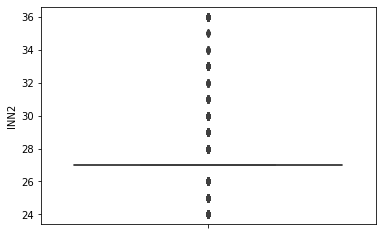

In [681]:
sns.boxplot(y='INN2', data=TEAM)
plt.show()

# 타겟 변수 이상치 처리

In [682]:
# 타겟 변수 이상치 데이터 담을 빈 데이터프레임 만들기

OUT.reset_index(drop=True, inplace=True)
OUT.drop(OUT.index[0:30], inplace=True)

In [683]:
TEAM_RUN = TEAM[(TEAM['RUN'] >15)|(TEAM['R']>15)]
TEAM_RUN

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,2.0,8.0,1.0,1.0,화,대구,24.0,11.0,WB27.0
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,24.0,...,0.0,0.0,4.0,0.0,2.0,화,대구,27.0,-11.0,LT24.0
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,10.0,2.0,2.0,목,대전,27.0,-15.0,LB27.0
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,1.0,7.0,1.0,1.0,목,대전,27.0,15.0,WT27.0
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,4.0,4.0,3.0,금,대전,27.0,-16.0,LB27.0
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,7.0,2.0,1.0,금,대전,27.0,16.0,WT27.0
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,27.0,...,0.0,1.0,7.0,1.0,3.0,토,사직,27.0,-6.0,LB27.0
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,0.0,27.0,...,0.0,0.0,7.0,0.0,1.0,토,사직,27.0,6.0,WT27.0
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,27.0,...,0.0,0.0,5.0,1.0,1.0,수,잠실,27.0,-16.0,LB27.0
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.0,5.0,0.0,1.0,수,잠실,27.0,16.0,WT27.0


In [684]:
# 20160412NCSS0 SS vs NC 16:5 11점차 경기 -> SS vs NC 12:2 10점차 경기로 대체
OUTLIER('20160412NCSS0', 'SS', 'NC', 20160000, 20169999, 10, 11, 12, 16)
OUTLIER('20160412NCSS0', 'NC', 'SS', 20160000, 20169999, -11, -10, 2, 5)

# 20160414OBHH0 HH vs OB 2:17 -15점차 경기 -> HH vs OB 3:13 -10점차 경기로 대체
OUTLIER('20160414OBHH0', 'HH', 'OB', 20160000, 20169999, -15, -10, 2, 3)
OUTLIER('20160414OBHH0', 'OB', 'HH', 20160000, 20169999, 10, 15, 13, 17)

# 20160415LGHH0 HH vs LG 2:18 -16점차 경기 -> HH vs LG 3:11 -8점차 경기로 대체
OUTLIER('20160415LGHH0', 'HH', 'LG', 20160000, 20169999, -16, -8, 0, 3)
OUTLIER('20160415LGHH0', 'LG', 'HH', 20160000, 20169999, 8, 16, 11, 18)

# 20160423HTLT0 LT vs HT 10:16 -6점차 경기 -> LT vs HT 6:9 -3점차 경기로 대체
OUTLIER('20160423HTLT0', 'LT', 'HT', 20160000, 20169999, -6, -3, 6, 10)
OUTLIER('20160423HTLT0', 'HT', 'LT', 20160000, 20169999, 3, 6, 9, 16)

# 20160504OBLG0 LG vs OB 1:17 -16점차 경기 -> LG vs OB 1:12 -11점차 경기로 대체
OUTLIER('20160504OBLG0', 'LG', 'OB', 20160000, 20169999, -16, -11, 1, 1)
OUTLIER('20160504OBLG0', 'OB', 'LG', 20160000, 20169999, 11, 16, 12, 17)

# 20160505HHSK0 SK vs HH 19:6 13점차 경기 -> SK vs HH 9:4 5점차 경기로 대체
OUTLIER('20160505HHSK0', 'SK', 'HH', 20160000, 20160730, 5, 13, 9, 19)
OUTLIER('20160505HHSK0', 'HH', 'SK', 20160000, 20160730, -13, -5, 4, 6)

# 20160505LTHT0 HT vs LT 17:1 16점차 경기 -> HT vs LT 11:4 7점차 경기로 대체
OUTLIER('20160505LTHT0', 'HT', 'LT', 20160000, 20169999, 7, 16, 11, 17)
OUTLIER('20160505LTHT0', 'LT', 'HT', 20160000, 20169999, -16, -7, 1, 4)

# 20160507HHKT0 KT vs HH 17:10 7점차 경기 -> KT vs HH 10:3 7점차 경기로 대체
OUTLIER('20160507HHKT0', 'KT', 'HH', 20160000, 20169999, 7, 7, 10, 17)
OUTLIER('20160507HHKT0', 'HH', 'KT', 20160000, 20169999, -7, -7, 3, 10)

# 20160508LTOB0 OB vs LT 11:17 -6점차 경기 -> OB vs LT 8:10 -2점차 경기로 대체
OUTLIER('20160508LTOB0', 'OB', 'LT', 20160000, 20169999, -6, -2, 8, 11)
OUTLIER('20160508LTOB0', 'LT', 'OB', 20160000, 20169999, 2, 6, 10, 17)

# 20160511SSLG0 LG vs SS 16:2 14점차 경기 -> LG vs SS 10:3 7점차 경기로 대체
OUTLIER('20160511SSLG0', 'LG', 'SS', 20160000, 20169999, 7, 14, 10, 16)
OUTLIER('20160511SSLG0', 'SS', 'LG', 20160000, 20169999, -14, -7, 2, 3)

# 20160511WOLT0 LT vs WO 2:16 -14점차 경기 -> LT vs WO 1:11 -10점차 경기로 대체
OUTLIER('20160511WOLT0', 'LT', 'WO', 20160000, 20169999, -14, -10, 1, 2)
OUTLIER('20160511WOLT0', 'WO', 'LT', 20160000, 20169999, 10, 14, 11, 16)

# 20160520OBLT0 LT vs OB 5:19 -14점차 경기 -> LT vs OB 4:11 -7점차 경기로 대체
OUTLIER('20160520OBLT0', 'LT', 'OB', 20160000, 20169999, -14, -7, 4, 5)
OUTLIER('20160520OBLT0', 'OB', 'LT', 20160000, 20169999, 7, 14, 11, 19)

# 20160522KTHH0 HH vs KT 7:18 -11점차 경기 -> HH vs KT 3:10 -7점차 경기로 대체
OUTLIER('20160522KTHH0', 'HH', 'KT', 20160000, 20169999, -11, -7, 3, 7)
OUTLIER('20160522KTHH0', 'KT', 'HH', 20160000, 20169999, 7, 11, 10, 18)

# 20160529LGOB0 OB vs LG 8:16 -8점차 경기 -> OB vs LG 4:10 -6점차 경기로 대체
OUTLIER('20160529LGOB0', 'OB', 'LG', 20160000, 20169999, -8, -6, 4, 8)
OUTLIER('20160529LGOB0', 'LG', 'OB', 20160000, 20169999, 6, 8, 10, 16)

# 20160609WONC0 NC vs WO 16:4 12점차 경기 -> NC vs WO 8:4 4점차 경기로 대체
OUTLIER('20160609WONC0', 'NC', 'WO', 20160000, 20169999, 4, 12, 8, 16)
OUTLIER('20160609WONC0', 'WO', 'NC', 20160000, 20169999, -12, -4, 4, 4)

# 20160622LTHT0 HT vs LT 5:18 -13점차 경기 -> HT vs LT 1:10 -9점차 경기로 대체
OUTLIER('20160622LTHT0', 'HT', 'LT', 20160000, 20169999, -13, -9, 1, 5)
OUTLIER('20160622LTHT0', 'LT', 'HT', 20160000, 20169999, 9, 13, 10, 18)

# 20160719KTHH0 HH vs KT 17:7 10점차 경기 -> HH vs KT 11:2 9점차 경기로 대체
OUTLIER('20160719KTHH0', 'HH', 'KT', 20160000, 20169999, 9, 10, 11, 17)
OUTLIER('20160719KTHH0', 'KT', 'HH', 20160000, 20169999, -10, -9, 2, 7)

# 20160810SSHH0 HH vs SS 7:16 -9점차 경기 -> HH vs SS 6:9 -3점차 경기로 대체
OUTLIER('20160810SSHH0', 'HH', 'SS', 20160000, 20169999, -9, -3, 6, 7)
OUTLIER('20160810SSHH0', 'SS', 'HH', 20160000, 20169999, 3, 9, 9, 16)

# 20160824LGOB0 OB vs LG 18:6 12점차 경기 -> OB vs LG 14:3 11점차 경기로 대체
OUTLIER('20160824LGOB0', 'OB', 'LG', 20160000, 20169999, 11, 12, 14, 18)
OUTLIER('20160824LGOB0', 'LG', 'OB', 20160000, 20169999, -12, -11, 3, 6)

# 20160901HTSS0 SS vs HT 8:16 -8점차 경기 -> SS vs HT 6:13 -7점차 경기로 대체
OUTLIER('20160901HTSS0', 'SS', 'HT', 20160000, 20169999, -8, -7, 6, 8)
OUTLIER('20160901HTSS0', 'HT', 'SS', 20160000, 20169999, 7, 8, 13, 16)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,3.0,5.0,3.0,0.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,8.0,1.0,0.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,10.0,0.0,1.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,2.0,0.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,...,0.0,0.0,11.0,2.0,0.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,...,1.0,1.0,3.0,0.0,0.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,...,0.0,0.0,6.0,1.0,2.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.5,4.5,1.0,0.0,수,잠실,25.5,11.0,NaN


In [685]:
# 20170402HTSS0 HT vs SS 3:16 -13점차 경기 -> HT vs SS 6:9 -3점차 경기로 대체
OUTLIER('20170402HTSS0', 'HT', 'SS', 20170000, 20179999, -13, -3, 3, 6)
OUTLIER('20170402HTSS0', 'SS', 'HT', 20170000, 20179999, 3, 13, 9, 16)

# 20170411HTOB0 HT vs OB 4:16 -12점차 경기 -> HT vs OB 3:7 -4점차 경기로 대체
OUTLIER('20170411HTOB0', 'HT', 'OB', 20170000, 20179999, -12, -4, 3, 4)
OUTLIER('20170411HTOB0', 'OB', 'HT', 20170000, 20179999, 4, 12, 7, 16)

# 20170427SSHT0 HT vs SS 16:9 7점차 경기 -> HT vs SS 11:4 7점차 경기로 대체
OUTLIER('20170427SSHT0', 'HT', 'SS', 20170000, 20179999, 7, 7, 11, 16)
OUTLIER('20170427SSHT0', 'SS', 'HT', 20170000, 20179999, -7, -7, 4, 9)

# 20170504OBSS0 SS vs OB 2:17 -15점차 경기 -> SS vs OB 4:14 -10점차 경기로 대체
OUTLIER('20170504OBSS0', 'SS', 'OB', 20170000, 20179999, -15, -10, 0, 4)
OUTLIER('20170504OBSS0', 'OB', 'SS', 20170000, 20179999, 10, 15, 14, 17)

# 20170525SKLT0 LT vs SK 17:6 11점차 경기 -> LT vs SK 7:2 5점차 경기로 대체
OUTLIER('20170525SKLT0', 'LT', 'SK', 20170000, 20179999, 5, 11, 7, 17)
OUTLIER('20170525SKLT0', 'SK', 'LT', 20170000, 20179999, -11, -5, 2, 6)

# 20170526SSWO0 WO vs SS 18:3 15점차 경기 -> WO vs SS 14:1 13점차 경기로 대체
OUTLIER('20170526SSWO0', 'WO', 'SS', 20170000, 20179999, 13, 15, 14, 18)
OUTLIER('20170526SSWO0', 'SS', 'WO', 20170000, 20179999, -15, -13, 1, 3)

# 20170608LTNC0 NC vs LT 16:0 16점차 경기 -> NC vs LT 12:4 8점차 경기로 대체
OUTLIER('20170608LTNC0', 'NC', 'LT', 20170000, 20179999, 8, 16, 12, 16)
OUTLIER('20170608LTNC0', 'LT', 'NC', 20170000, 20179999, -16, -8, 0, 4)

# 20170611SKLG0 LG vs SK 19:1 18점차 경기 -> LG vs SK 12:6 6점차 경기로 대체
OUTLIER('20170611SKLG0', 'LG', 'SK', 20170000, 20179999, 6, 18, 12, 19)
OUTLIER('20170611SKLG0', 'SK', 'LG', 20170000, 20179999, -18, -6, 1, 6)

# 20170618LGHT0 HT vs LG 8:16 -8점차 경기 -> HT vs LG 1:7 -6점차 경기로 대체
OUTLIER('20170618LGHT0', 'HT', 'LG', 20170000, 20179999, -8, -6, 1, 8)
OUTLIER('20170618LGHT0', 'LG', 'HT', 20170000, 20179999, 6, 8, 7, 16)

# 20170621OBHT0 HT vs OB 20:8 12점차 경기 ->HT vs OB 11:5 6점차 경기로 대체
OUTLIER('20170621OBHT0', 'HT', 'OB', 20170000, 20179999, 6, 12, 11, 20)
OUTLIER('20170621OBHT0', 'OB', 'HT', 20170000, 20179999, -12, -6, 5, 8)

# 20170629SSHT0 HT vs SS 22:1 21점차 경기 ->HT vs SS 13:3 10점차 경기로 대체
OUTLIER('20170629SSHT0', 'HT', 'SS', 20170000, 20179999, 10, 21, 13, 22)
OUTLIER('20170629SSHT0', 'SS', 'HT', 20170000, 20179999, -21, -10, 1, 3)

# 20170705HTSK0 SK vs HT 18:17 1점차 경기 ->SK vs HT 15:10 5점차 경기로 대체
OUTLIER('20170705HTSK0', 'SK', 'HT', 20170000, 20179999, 1, 5, 15, 18)
OUTLIER('20170705HTSK0', 'HT', 'SK', 20170000, 20179999, -5, -1, 10, 17)

# 20170708HTKT0 KT vs HT 8:20 -12점차 경기 ->KT vs HT 2:10 -8점차 경기로 대체
OUTLIER('20170708HTKT0', 'KT', 'HT', 20170000, 20179999, -12, -8, 2, 8)
OUTLIER('20170708HTKT0', 'HT', 'KT', 20170000, 20179999, 8, 12, 10, 20)

# 20170722HHOB0 OB vs HH 17:1 16점차 경기 ->OB vs HH 8:1 7점차 경기로 대체
OUTLIER('20170722HHOB0', 'OB', 'HH', 20170000, 20179999, 7, 16, 8, 17)
OUTLIER('20170722HHOB0', 'HH', 'OB', 20170000, 20179999, -16, -7, 1, 1)

# 20170910WOSK0 SK vs WO 17:8 9점차 경기 ->SK vs WO 13:5 8점차 경기로 대체
OUTLIER('20170910WOSK0', 'SK', 'WO', 20170000, 20179999, 6, 9, 13, 17)
OUTLIER('20170910WOSK0', 'WO', 'SK', 20170000, 20179999, -9, -6, 5, 8)

# 20170916KTHT0 HT vs KT 17:3 14점차 경기 ->HT vs KT 10:2 8점차 경기로 대체
OUTLIER('20170916KTHT0', 'HT', 'KT', 20170000, 20179999, 8, 14, 10, 17)
OUTLIER('20170916KTHT0', 'KT', 'HT', 20170000, 20179999, -14, -8, 2, 3)

# 20170917OBSS0 SS vs OB 8:21 -13점차 경기 ->SS vs OB 4:14 -10점차 경기로 대체
OUTLIER('20170917OBSS0', 'SS', 'OB', 20170000, 20179999, -13, -10, 4, 8)
OUTLIER('20170917OBSS0', 'OB', 'SS', 20170000, 20179999, 10, 13, 14, 21)

# 20171001HTKT0 KT vs HT 20:2 18점차 경기 ->KT vs HT 15:7 8점차 경기로 대체
OUTLIER('20171001HTKT0', 'KT', 'HT', 20170000, 20179999, 8, 18, 15, 20)
OUTLIER('20171001HTKT0', 'HT', 'KT', 20170000, 20179999, -18, -8, 2, 7)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,3.0,5.0,3.0,0.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,8.0,1.0,0.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,10.0,0.0,1.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,2.0,0.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,...,0.0,0.0,11.0,2.0,0.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,...,1.0,1.0,3.0,0.0,0.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,...,0.0,0.0,6.0,1.0,2.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.5,4.5,1.0,0.0,수,잠실,25.5,11.0,NaN


In [686]:
# 20180327SSHT0 SS vs HT 0:17 -17점차 경기 -> SS vs HT 4:12  -8점차 경기로 대체
OUTLIER('20180327SSHT0', 'SS', 'HT', 20180000, 20180909, -17, -8, 0, 4)
OUTLIER('20180327SSHT0', 'HT', 'SS', 20180000, 20189999, 8, 17, 12, 17)

# 20180331OBKT0 OB vs KT 8:20 -12점차 경기 -> OB vs KT 4:11  -7점차 경기로 대체
OUTLIER('20180331OBKT0', 'OB', 'KT', 20180000, 20189999, -12, -7, 4, 8)
OUTLIER('20180331OBKT0', 'KT', 'OB', 20180000, 20189999, 7, 12, 11, 20)

# 20180403LTHH0 LT vs HH 11:17 -6점차 경기 -> LT vs HH 5:11  -6점차 경기로 대체
OUTLIER('20180403LTHH0', 'LT', 'HH', 20180000, 20189999, -6, -6, 5, 11)
OUTLIER('20180403LTHH0', 'HH', 'LT', 20180000, 20189999, 6, 6, 11, 17)

# 20180520NCKT0 NC vs KT 3:18 -15점차 경기 -> NC vs KT 0:10  -10점차 경기로 대체
OUTLIER('20180520NCKT0', 'NC', 'KT', 20180000, 20189999, -15, -10, 0, 3)
OUTLIER('20180520NCKT0', 'KT', 'NC', 20180000, 20189999, 10, 15, 10, 18)

# 20180622OBSS0 OB vs SS 14:16 -2점차 경기 -> OB vs SS 1:11  -10점차 경기로 대체
OUTLIER('20180622OBSS0', 'OB', 'SS', 20180000, 20189999, -10, -2, 3, 14)
OUTLIER('20180622OBSS0', 'SS', 'OB', 20180000, 20189999, 2, 10, 11, 16)

# 20180623LTLG0 LT vs LG 8:18 -10점차 경기 -> LT vs LG 5:15  10점차 경기로 대체
OUTLIER('20180623LTLG0', 'LT', 'LG', 20180000, 20189999, -10, -10, 5, 8)
OUTLIER('20180623LTLG0', 'LG', 'LT', 20180000, 20189999, 10, 10, 0, 18)

# 20180711WOHH0 HH vs WO 8:22 -14점차 경기 -> HH vs WO 5:16  -11점차 경기로 대체
OUTLIER('20180711WOHH0', 'HH', 'WO', 20180000, 20189999, -14, -11, 5, 8)
OUTLIER('20180711WOHH0', 'WO', 'HH', 20180000, 20189999, 11, 14, 16, 22)

# 20180721OBLG0 OB vs LG 17:10 7점차 경기 -> OB vs LG 10:3  7점차 경기로 대체
OUTLIER('20180721OBLG0', 'OB', 'LG', 20180000, 20189999, 7, 7, 10, 17)
OUTLIER('20180721OBLG0', 'LG', 'OB', 20180000, 20189999, -7, -7, 3, 10)

# 20180727HHOB0 HH vs OB 16:7 9점차 경기 -> HH vs OB 9:4  5점차 경기로 대체
OUTLIER('20180727HHOB0', 'HH', 'OB', 20180000, 20189999, 4, 9, 9, 16)
OUTLIER('20180727HHOB0', 'OB', 'HH', 20180000, 20189999, -9, -4, 4, 7)

# 20180805WOKT0 KT vs WO 2:20 -18점차 경기 -> KT vs WO 1:10  -9점차 경기로 대체
OUTLIER('20180805WOKT0', 'KT', 'WO', 20180000, 20189999, -18, -10, 1, 2)
OUTLIER('20180805WOKT0', 'WO', 'KT', 20180000, 20189999, 10, 18, 11, 20)

# WO vs HH 16:5 11점차 경기 -> WO vs HH 10:1  9점차 경기로 대체
OUTLIER('20180809WOHH0', 'WO', 'HH', 20180000, 20189999, 9, 11, 10, 16)
OUTLIER('20180809WOHH0', 'HH', 'WO', 20180000, 20189999, -11, -9, 1, 5)

# HT vs SK 18:4 14점차 경기 -> HT vs SK 8:3  5점차 경기로 대체
OUTLIER('20180811HTSK0', 'HT', 'SK', 20180000, 20189999, 5, 14, 8, 18)
OUTLIER('20180811HTSK0', 'SK', 'HT', 20180000, 20189999, -14, -5, 3, 4)

# HT vs SK 21:8 13점차 경기 -> HT vs SK 8:3  5점차 경기로 대체
OUTLIER('20180812HTSK0', 'HT', 'SK', 20180000, 20189999, 5, 13, 8, 21)
OUTLIER('20180812HTSK0', 'SK', 'HT', 20180000, 20189999, -13, -5, 2, 8)

# OB vs LT 19:6 13점차 경기 -> OB vs LT 9:2  7점차 경기로 대체
OUTLIER('20180911OBLT0', 'OB', 'LT', 20180000, 20189999, 0, 13, 10, 19)
OUTLIER('20180911OBLT0', 'LT', 'OB', 20180000, 20189999, -13, -7, 2, 6)

# HT vs SS 18:3 15점차 경기 -> HT vs SS 12:4  8점차 경기로 대체
OUTLIER('20180918HTSS0', 'HT', 'SS', 20180000, 20189999, 8, 15, 12, 18)
OUTLIER('20180918HTSS0', 'SS', 'HT', 20180000, 20189999, -15, -8, 3, 4)

# SK  vs KT 18:8 10점차 경기 -> SK  vs KT 13:9  4점차 경기로 대체
OUTLIER('20180919SKKT0', 'SK', 'KT', 20180000, 20189999, 4, 10, 13, 18)
OUTLIER('20180919SKKT0', 'KT', 'SK', 20180000, 20189999, -10, -4, 8, 9)

# LG  vs SK 7:16 -9점차 경기 -> LG  vs SK 3:12  -9점차 경기로 대체
OUTLIER('20180925LGSK0', 'LG', 'SK', 20180000, 20189999, -9, -9, 3, 7)
OUTLIER('20180925LGSK0', 'SK', 'LG', 20180000, 20189999, 9, 9, 12, 16)

# HT  vs SS 5:20 -15점차 경기 -> HT  vs SS 1:13  -12점차 경기로 대체
OUTLIER('20181003HTSS0', 'HT', 'SS', 20180000, 20189999, -15, -12, 1, 5)
OUTLIER('20181003HTSS0', 'SS', 'HT', 20180000, 20189999, 12, 15, 13, 20)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,3.0,5.0,3.0,0.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,8.0,1.0,0.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,10.0,0.0,1.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,2.0,0.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,...,0.0,0.0,11.0,2.0,0.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,...,1.0,1.0,3.0,0.0,0.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,...,0.0,0.0,6.0,1.0,2.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.5,4.5,1.0,0.0,수,잠실,25.5,11.0,NaN


In [687]:
# 20190327SSLT0 LT  vs SS 4:23 -19점차 경기 -> LT  vs SS 7:12  -5점차 경기로 대체
OUTLIER('20190327SSLT0', 'LT', 'SS', 20190000, 20199999, -19, -5, 4, 7)
OUTLIER('20190327SSLT0', 'SS', 'LT', 20190000, 20199999, 5, 19, 12, 23)

# 20190421SSHH0 HH  vs SS 0:16 -16점차 경기 -> SS  vs HH 6:13  -7점차 경기로 대체
OUTLIER('20190421SSHH0', 'HH', 'SS', 20190000, 20199999, -16, -7, 0, 6)
OUTLIER('20190421SSHH0', 'SS', 'HH', 20190000, 20199999, 7, 16, 13, 16)

# 20190508HHSK0 HH  vs SK 2:17 -15점차 경기 -> HH  vs SK 2:11  -9점차 경기로 대체
OUTLIER('20190508HHSK0', 'HH', 'SK', 20190000, 20199999, -15, -9, 2, 2)
OUTLIER('20190508HHSK0', 'SK', 'HH', 20190000, 20199999, 9, 15, 11, 17)

# 20190526KTHT0 KT  vs HT 5:17 -12점차 경기 -> KT  vs HT 3:10  -7점차 경기로 대체
OUTLIER('20190526KTHT0', 'KT', 'HT', 20190000, 20199999, -12, -7, 3, 5)
OUTLIER('20190526KTHT0', 'HT', 'KT', 20190000, 20199999, 7, 12, 10, 17)

# 20190806LGHT0 HT vs LG 4:17 -13점차 경기 -> HT vs LG 3:15  -12점차 경기로 대체
OUTLIER('20190806LGHT0', 'HT', 'LG', 20190000, 20199999, -13, -12, 3, 4)
OUTLIER('20190806LGHT0', 'LG', 'HT', 20190000, 20199999, 12, 13, 15, 17)

# 20190807WOLT0 LT vs WO 4:16 -12점차 경기 -> LT vs WO 1:13  -12점차 경기로 대체
OUTLIER('20190807WOLT0', 'LT', 'WO', 20190000, 20199999, -12, -12, 1, 4)
OUTLIER('20190807WOLT0', 'WO', 'LT', 20190000, 20199999, 12, 12, 13, 16)

# 20190825WOSS0 SS vs WO 8:21 -13점차 경기 -> SS vs WO 2:12 -10점차 경기로 대체
OUTLIER('20190825WOSS0', 'SS', 'WO', 20190000, 20199999, -13, -10, 2, 8)
OUTLIER('20190825WOSS0', 'WO', 'SS', 20190000, 20199999, 10, 13, 12, 21)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,3.0,5.0,3.0,0.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,8.0,1.0,0.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,10.0,0.0,1.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,2.0,0.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,...,0.0,0.0,11.0,2.0,0.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,...,1.0,1.0,3.0,0.0,0.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,...,0.0,0.0,6.0,1.0,2.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.5,4.5,1.0,0.0,수,잠실,25.5,11.0,NaN


In [688]:
# 20200531NCSS0 NC vs SS 18:7 11점차 경기 -> NC vs SS 8:2 6점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200531NCSS0', 'NC', 'SS', 20200000, 20209999, 6, 11, 8, 18)
OUTLIER('20200531NCSS0', 'SS', 'NC', 20200000, 20209999, -11, -6, 2, 7)

#20200613WONC0 NC vs WO 5:18 -13점차 경기 -> NC vs WO 4:7 -3점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200613WONC0', 'NC', 'WO', 20200000, 20209999, -13, -3, 4, 5)
OUTLIER('20200613WONC0', 'WO', 'NC', 20200000, 20209999, 3, 13, 7, 18)

# 20200619OBLG0 OB vs LG 18:10 8점차 경기 -> NC vs WO 9:3 6점차 경기
OUTLIER('20200619OBLG0', 'OB', 'LG', 20200000, 20209999, 6, 8, 9, 18)
OUTLIER('20200619OBLG0', 'LG', 'OB', 20200000, 20209999, -8, -6, 3, 10)

# 20200625NCKT2 NC vs KT 6:19 -13점차 경기 -> NC vs KT 1:10 -9점차 경기
OUTLIER('20200625NCKT2', 'NC', 'KT', 20200000, 20209999, -13, -9, 1, 6)
OUTLIER('20200625NCKT2', 'KT', 'NC', 20200000, 20209999, 9, 13, 10, 19)

# 20200728LGSK0 SK vs LG 7:24 -17점차 경기 -> SK vs LG 2:14 -12점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200728LGSK0', 'SK', 'LG', 20200000, 20209999, -17, -12, 2, 7)
OUTLIER('20200728LGSK0', 'LG', 'SK', 20200000, 20209999, 12, 17, 14, 24)

# 20200801WOSS0 SS vs WO 7:22 -15점차 경기 -> SS vs WO 3:10 -7점차 경기
OUTLIER('20200801WOSS0', 'SS', 'WO', 20200000, 20209999, -15, -7, 3, 7)
OUTLIER('20200801WOSS0', 'WO', 'SS', 20200000, 20209999, 7, 15, 10, 22)

# 20200819HHSK0 SK vs HH 26:6 20점차 경기 -> SK vs HH 9:3 6점차 경기
OUTLIER('20200819HHSK0', 'SK', 'HH', 20200000, 20209999, 6, 20, 9, 26)
OUTLIER('20200819HHSK0', 'HH', 'SK', 20200000, 20209999, -20, -6, 3, 6)

# 20200908WOSK0 WO vs SK 16:15 1점차 경기 -> WO vs SK 9:8 1점차 경기
OUTLIER('20200908WOSK0', 'WO', 'SK', 20200000, 20209999, 1, 1, 9, 16)
OUTLIER('20200908WOSK0', 'SK', 'WO', 20200000, 20209999, -1, -1, 8, 15)

# 20200915SKHT0 HT vs SK 1:16 -15점차 경기 -> WO vs SK 4:10 -6점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200915SKHT0', 'HT', 'SK', 20200000, 20209999, -15, -6, 1, 4)
OUTLIER('20200915SKHT0', 'SK', 'HT', 20200000, 20209999, 6, 15, 10, 16)

# 20200926LTHT0 LT vs HT 16:3 13점차 경기 -> LT vs HT  7:3 4점차 경기
# INN2, H_INN2 바꾸기
OUTLIER('20200926LTHT0', 'LT', 'HT', 20200000, 20209999, 4, 13, 7, 16)
OUTLIER('20200926LTHT0', 'HT', 'LT', 20200000, 20209999, -13, -4, 3, 3)

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,WLS,HOLD,INN2,...,IB,HP,KK,GD,H_ERR,GWEEK,STADIUM,H_INN2,RUN_R,WL_TB_INN2
88,20160412NCSS0,20160412,SS,NC,0,B,0.0,W,0.0,27.0,...,0.0,3.0,5.0,3.0,0.0,화,대구,27.0,10.0,NaN
89,20160412NCSS0,20160412,NC,SS,0,T,0.0,L,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,화,대구,27.0,-10.0,NaN
110,20160414OBHH0,20160414,HH,OB,0,B,0.0,L,0.0,27.0,...,0.0,1.0,8.0,1.0,0.0,목,대전,27.0,-10.0,NaN
111,20160414OBHH0,20160414,OB,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,10.0,0.0,1.0,목,대전,27.0,10.0,NaN
112,20160415LGHH0,20160415,HH,LG,0,B,0.0,L,0.0,27.0,...,0.0,0.0,6.0,2.0,0.0,금,대전,27.0,-8.0,NaN
113,20160415LGHH0,20160415,LG,HH,0,T,0.0,W,0.0,27.0,...,0.0,0.0,6.0,1.0,0.0,금,대전,27.0,8.0,NaN
174,20160423HTLT0,20160423,LT,HT,0,B,0.0,L,0.0,24.0,...,0.0,0.0,11.0,2.0,0.0,토,사직,27.0,-3.0,NaN
175,20160423HTLT0,20160423,HT,LT,0,T,0.0,W,2.0,27.0,...,1.0,1.0,3.0,0.0,0.0,토,사직,24.0,3.0,NaN
258,20160504OBLG0,20160504,LG,OB,0,B,0.0,L,0.0,24.0,...,0.0,0.0,6.0,1.0,2.0,수,잠실,27.0,-11.0,NaN
259,20160504OBLG0,20160504,OB,LG,0,T,0.0,W,0.0,27.0,...,0.0,1.5,4.5,1.0,0.0,수,잠실,25.5,11.0,NaN


In [689]:
# 이닝수 정상으로 변환

OUT.loc[(OUT['G_ID']=='20160412NCSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160412NCSS0')&(OUT['T_ID']=='NC'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160423HTLT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160423HTLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160504OBLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160504OBLG0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160505HHSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160505HHSK0')&(OUT['T_ID']=='HH'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160505LTHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160505LTHT0')&(OUT['T_ID']=='LT'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160508LTOB0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160511SSLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160511SSLG0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20160520OBLT0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160520OBLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160522KTHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160522KTHH0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160529LGOB0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160529LGOB0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160622LTHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160622LTHT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160810SSHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20160810SSHH0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20160824LGOB0')&(OUT['T_ID']=='LG'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20160824LGOB0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 24.0


OUT.loc[(OUT['G_ID']=='20170402HTSS0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170402HTSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170411HTOB0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170411HTOB0')&(OUT['T_ID']=='OB'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170525SKLT0')&(OUT['T_ID']=='SK'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170525SKLT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170611SKLG0')&(OUT['T_ID']=='SK'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170611SKLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170618LGHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20170618LGHT0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20170629SSHT0')&(OUT['T_ID']=='SS'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170629SSHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170910WOSK0')&(OUT['T_ID']=='WO'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170910WOSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20170916KTHT0')&(OUT['T_ID']=='KT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20170916KTHT0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20171001HTKT0')&(OUT['T_ID']=='HT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20171001HTKT0')&(OUT['T_ID']=='KT'), 'H_INN2'] = 24.0


OUT.loc[(OUT['G_ID']=='20180622OBSS0')&(OUT['T_ID']=='OB'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180622OBSS0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180623LTLG0')&(OUT['T_ID']=='LT'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180623LTLG0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 24.0

OUT.loc[(OUT['G_ID']=='20180727HHOB0')&(OUT['T_ID']=='OB'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180727HHOB0')&(OUT['T_ID']=='HH'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180811HTSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180811HTSK0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180812HTSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180812HTSK0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180918HTSS0')&(OUT['T_ID']=='SS'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180918HTSS0')&(OUT['T_ID']=='HT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180919SKKT0')&(OUT['T_ID']=='KT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20180919SKKT0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180925LGSK0')&(OUT['T_ID']=='LG'), 'INN2'] = 24.0
OUT.loc[(OUT['G_ID']=='20180925LGSK0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 24.0


OUT.loc[(OUT['G_ID']=='20190421SSHH0')&(OUT['T_ID']=='HH'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190421SSHH0')&(OUT['T_ID']=='SS'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190806LGHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190806LGHT0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190807WOLT0')&(OUT['T_ID']=='LT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190807WOLT0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20190825WOSS0')&(OUT['T_ID']=='SS'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20190825WOSS0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200613WONC0')&(OUT['T_ID']=='NC'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200613WONC0')&(OUT['T_ID']=='WO'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200728LGSK0')&(OUT['T_ID']=='SK'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200728LGSK0')&(OUT['T_ID']=='LG'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200915SKHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200915SKHT0')&(OUT['T_ID']=='SK'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20200926LTHT0')&(OUT['T_ID']=='HT'), 'INN2'] = 27.0
OUT.loc[(OUT['G_ID']=='20200926LTHT0')&(OUT['T_ID']=='LT'), 'H_INN2'] = 27.0

OUT.loc[(OUT['G_ID']=='20180711WOHH0')&(OUT['T_ID']=='HH'), 'R'] = 15.0
OUT.loc[(OUT['G_ID']=='20180711WOHH0')&(OUT['T_ID']=='WO'), 'RUN'] = 15.0

In [690]:
TEAM = pd.concat([TEAM, OUT])
TEAM.sort_index(inplace=True)

# 실점 모델을 위한 팀 파생변수 만들기

In [691]:
# 이닝수 만들기
TEAM['INN'] = TEAM['INN2'] / 3

# ERA 분자, 분모 만들기
TEAM['ERA_n'] = TEAM['ER']*9
TEAM['ERA_d'] = TEAM['INN']

# FIP 분자, 분모 만들기
TEAM['FIP_n'] = (TEAM['P_HR']*13 + (TEAM['P_BB']+TEAM['P_HP']-TEAM['P_IB'])*3 - TEAM['P_KK']*2) + 3.2*TEAM['INN']
TEAM['FIP_d'] = TEAM['INN']

# KFIP 분자, 분모 만들기
TEAM['KFIP_n'] = (TEAM['P_HR']*14 + (TEAM['P_BB']+TEAM['P_HP'])*3 - TEAM['P_KK']) + 3.2*TEAM['INN'] 
TEAM['KFIP_d'] = TEAM['INN']

# WHIP 분자, 분모 만들기
TEAM['WHIP_n'] = TEAM['P_HIT'] + TEAM['P_BB']
TEAM['WHIP_d'] = TEAM['INN']

# PTB(ERC를 위한) 만들기
TEAM['PTB'] = 0.89*(1.255*(TEAM['P_HIT']-TEAM['P_HR'])+4*TEAM['P_HR']) + 0.56*(TEAM['P_BB']+TEAM['P_HP'])

# ERC 분자, 분모 만들기 (-0.56 하거나 *0.75 해야함)
TEAM['ERC_n'] = (TEAM['P_HIT']+TEAM['P_BB']+TEAM['P_HP'])*TEAM['PTB']*9
TEAM['ERC_d'] = TEAM['P_PA']*TEAM['INN']

# LOB_RT(잔루처리율) 만들기
TEAM['LOB_n'] = (TEAM['P_HIT'] + TEAM['P_BB'] + TEAM['P_HP'] - TEAM['R'])
TEAM['LOB_d'] = (TEAM['P_HIT'] + TEAM['P_BB'] + TEAM['P_HP'] - 1.4*TEAM['HR'])

# KwERA 분자, 분모 만들기
# 5.4 - (TEAM['KwERA_n']/TEAM['KwERA_d'])
TEAM['KwERA_n'] = 12*(TEAM['P_KK'] - TEAM['P_BB'])
TEAM['KwERA_d'] = TEAM['PA']

# BABIP 분자, 분모 만들기
TEAM['P_BABIP_n'] = TEAM['P_HIT'] - TEAM['P_HR']
TEAM['P_BABIP_d'] = TEAM['P_AB'] - TEAM['P_KK']- TEAM['P_HR'] + TEAM['P_SF']

# 사이영포인트 만들기
TEAM['SAP'] = (0.55*TEAM['INN']-TEAM['ER'])+TEAM['P_KK']/10


# 1루타 만들기
TEAM['P_H1'] = TEAM['P_HIT'] - TEAM['P_H2'] - TEAM['P_H3'] - TEAM['P_HR']

# 이닝당 HIT 가중치 만들기
TEAM['YANG_n'] = TEAM['P_H1'] + TEAM['P_H2']*2 + TEAM['P_H3']*3 + TEAM['P_HR']*4
TEAM['YANG_d'] = TEAM['INN']

# 실점 모델 팀 파생변수 입력변수로 변환하기

In [692]:
# 입력변수 만들 경기 데이터셋 자르기

LOST1 = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
              'CG_CK', 'HOLD', 'INN2', 'BF', 'P_PA', 'P_AB', 'P_HIT', 'P_H2', 'P_H3', 
              'P_HR', 'P_SB', 'P_CS', 'P_SH', 'P_SF', 'P_BB', 'P_IB', 'P_HP', 'P_KK', 
              'P_GD', 'WP', 'BK', 'P_ERR', 'R', 'ER', 'H_ERR', 'SAP', 'P_H1']]

LOST2 = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
              'ERA_n', 'ERA_d', 'FIP_n', 'FIP_d', 'KFIP_n', 'KFIP_d', 'WHIP_n', 
              'WHIP_d', 'ERC_n', 'ERC_d', 'LOB_n', 'LOB_d', 'KwERA_n', 'KwERA_d', 
              'P_BABIP_n', 'P_BABIP_d', 'YANG_n', 'YANG_d']]

LOST2['ERA'] = 1
LOST2['FIP'] = 1
LOST2['KFIP'] = 1
LOST2['WHIP'] = 1
LOST2['ERC'] = 1
LOST2['LOB_RT'] = 1
LOST2['KwERA'] = 1
LOST2['P_BABIP'] = 1
LOST2['YANG'] = 1

LOST1_16_12 = LOST1.iloc[0:460, :]
LOST1_16_23 = LOST1.iloc[220:700,:]
LOST1_16_34 = LOST1.iloc[460:940,:]
LOST1_16_45 = LOST1.iloc[700:1180,:]

LOST1_17_12 = LOST1.iloc[1440:1900, :]
LOST1_17_23 = LOST1.iloc[1660:2140,:]
LOST1_17_34 = LOST1.iloc[1900:2380,:]
LOST1_17_45 = LOST1.iloc[2140:2620,:]

LOST1_18_12 = LOST1.iloc[2880:3340, :]
LOST1_18_23 = LOST1.iloc[3100:3580,:]
LOST1_18_34 = LOST1.iloc[3340:3820,:]
LOST1_18_45 = LOST1.iloc[3580:4060,:]

LOST1_19_12 = LOST1.iloc[4320:4780, :]
LOST1_19_23 = LOST1.iloc[4540:5020,:]
LOST1_19_34 = LOST1.iloc[4780:5260,:]
LOST1_19_45 = LOST1.iloc[5020:5500,:]

LOST1_20_12 = LOST1.iloc[5760:6220, :]
LOST1_20_23 = LOST1.iloc[5980:6460,:]
LOST1_20_34 = LOST1.iloc[6220:6700,:]
LOST1_20_45 = LOST1.iloc[6460:6942,:]

LOST2_16_12 = LOST2.iloc[0:460, :]
LOST2_16_23 = LOST2.iloc[220:700,:]
LOST2_16_34 = LOST2.iloc[460:940,:]
LOST2_16_45 = LOST2.iloc[700:1180,:]

LOST2_17_12 = LOST2.iloc[1440:1900, :]
LOST2_17_23 = LOST2.iloc[1660:2140,:]
LOST2_17_34 = LOST2.iloc[1900:2380,:]
LOST2_17_45 = LOST2.iloc[2140:2620,:]

LOST2_18_12 = LOST2.iloc[2880:3340, :]
LOST2_18_23 = LOST2.iloc[3100:3580,:]
LOST2_18_34 = LOST2.iloc[3340:3820,:]
LOST2_18_45 = LOST2.iloc[3580:4060,:]

LOST2_19_12 = LOST2.iloc[4320:4780, :]
LOST2_19_23 = LOST2.iloc[4540:5020,:]
LOST2_19_34 = LOST2.iloc[4780:5260,:]
LOST2_19_45 = LOST2.iloc[5020:5500,:]

LOST2_20_12 = LOST2.iloc[5760:6220, :]
LOST2_20_23 = LOST2.iloc[5980:6460,:]
LOST2_20_34 = LOST2.iloc[6220:6700,:]
LOST2_20_45 = LOST2.iloc[6460:6942,:]

In [693]:
# 분석용 데이터셋 자르기

LOST = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC']]
TARGET = TEAM[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'R', 'ER', 'INN2']]
TARGET.rename({'R':'R_TARGET', 'ER':'ER_TARGET', 'INN2':'INN2_TARGET'}, axis='columns')


LOST1_16_3 = LOST.iloc[460:700,:]
LOST1_16_4 = LOST.iloc[700:940,:]
LOST1_16_5 = LOST.iloc[940:1180,:]
LOST1_16_6 = LOST.iloc[1180:1440,:]

LOST1_17_3 = LOST.iloc[1900:2140,:]
LOST1_17_4 = LOST.iloc[2140:2380,:]
LOST1_17_5 = LOST.iloc[2380:2620,:]
LOST1_17_6 = LOST.iloc[2620:2880,:]

LOST1_18_3 = LOST.iloc[3340:3580,:]
LOST1_18_4 = LOST.iloc[3580:3820,:]
LOST1_18_5 = LOST.iloc[3820:4060,:]
LOST1_18_6 = LOST.iloc[4060:4320,:]

LOST1_19_3 = LOST.iloc[4780:5020,:]
LOST1_19_4 = LOST.iloc[5020:5260,:]
LOST1_19_5 = LOST.iloc[5260:5500,:]
LOST1_19_6 = LOST.iloc[5500:5760,:]

LOST1_20_3 = LOST.iloc[6220:6460,:]
LOST1_20_4 = LOST.iloc[6460:6700,:]
LOST1_20_5 = LOST.iloc[6700:6942,:]
LOST1_20_6 = LOST.iloc[6942:7200,:]


LOST2_16_3 = LOST.iloc[460:700,:]
LOST2_16_4 = LOST.iloc[700:940,:]
LOST2_16_5 = LOST.iloc[940:1180,:]
LOST2_16_6 = LOST.iloc[1180:1440,:]

LOST2_17_3 = LOST.iloc[1900:2140,:]
LOST2_17_4 = LOST.iloc[2140:2380,:]
LOST2_17_5 = LOST.iloc[2380:2620,:]
LOST2_17_6 = LOST.iloc[2620:2880,:]

LOST2_18_3 = LOST.iloc[3340:3580,:]
LOST2_18_4 = LOST.iloc[3580:3820,:]
LOST2_18_5 = LOST.iloc[3820:4060,:]
LOST2_18_6 = LOST.iloc[4060:4320,:]

LOST2_19_3 = LOST.iloc[4780:5020,:]
LOST2_19_4 = LOST.iloc[5020:5260,:]
LOST2_19_5 = LOST.iloc[5260:5500,:]
LOST2_19_6 = LOST.iloc[5500:5760,:]

LOST2_20_3 = LOST.iloc[6220:6460,:]
LOST2_20_4 = LOST.iloc[6460:6700,:]
LOST2_20_5 = LOST.iloc[6700:6942,:]
LOST2_20_6 = LOST.iloc[6942:7200,:]

In [694]:
# 분모, 분자 따로 할 필요 없는 입력변수들 가중평균입력변수로 변환하는 함수

def t_weighted_mean(dataset, t_id, vs_t_id):
    
        t_id = dataset[dataset['T_ID'] == t_id]
        t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
        t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
        t_id_vsx.reset_index(inplace=True)
        t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]
        
        t_record_mean = t_id_record.groupby(['T_ID'], as_index=False).mean()
        t_latest_mean = t_id_latest.groupby(['T_ID'], as_index=False).mean()
        
        t_record_mean['weight'] = 0.8
        t_latest_mean['weight'] = 0.2
        
        t_mean = pd.concat([t_record_mean, t_latest_mean])
        
        xlist = ['CG_CK', 'HOLD', 'INN2', 'BF', 'P_PA', 'P_AB', 'P_HIT', 'P_H2', 
                 'P_H3', 'P_HR', 'P_SB', 'P_CS', 'P_SH', 'P_SF', 'P_BB', 'P_IB', 'P_HP', 
                 'P_KK', 'P_GD', 'WP', 'BK', 'P_ERR', 'R', 'ER', 'H_ERR', 'SAP', 
                 'P_H1']
        
        for x in xlist:
            t_mean[x]=t_mean[x]*t_mean['weight']
            
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
        t_mean['VS_T_ID'] = vs_t_id
        t_mean.drop(['GDAY_DS', 'HEADER_NO', 'weight'], inplace=True, axis=1)
        
        return t_mean

In [695]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT(dataset, dataset_name):
    
    NC_LG = t_weighted_mean(dataset, 'NC', 'LG')
    NC_WO = t_weighted_mean(dataset, 'NC', 'WO')
    NC_OB = t_weighted_mean(dataset, 'NC', 'OB')
    NC_KT = t_weighted_mean(dataset, 'NC', 'KT')
    NC_HT = t_weighted_mean(dataset, 'NC', 'HT')
    NC_LT = t_weighted_mean(dataset, 'NC', 'LT')
    NC_SS = t_weighted_mean(dataset, 'NC', 'SS')
    NC_SK = t_weighted_mean(dataset, 'NC', 'SK')
    NC_HH = t_weighted_mean(dataset, 'NC', 'HH')

    LG_NC = t_weighted_mean(dataset, 'LG', 'NC')
    LG_WO = t_weighted_mean(dataset, 'LG', 'WO')
    LG_OB = t_weighted_mean(dataset, 'LG', 'OB')
    LG_KT = t_weighted_mean(dataset, 'LG', 'KT')
    LG_HT = t_weighted_mean(dataset, 'LG', 'HT')
    LG_LT = t_weighted_mean(dataset, 'LG', 'LT')
    LG_SS = t_weighted_mean(dataset, 'LG', 'SS')
    LG_SK = t_weighted_mean(dataset, 'LG', 'SK')
    LG_HH = t_weighted_mean(dataset, 'LG', 'HH')

    WO_NC = t_weighted_mean(dataset, 'WO', 'NC')
    WO_LG = t_weighted_mean(dataset, 'WO', 'LG')
    WO_OB = t_weighted_mean(dataset, 'WO', 'OB')
    WO_KT = t_weighted_mean(dataset, 'WO', 'KT')
    WO_HT = t_weighted_mean(dataset, 'WO', 'HT')
    WO_LT = t_weighted_mean(dataset, 'WO', 'LT')
    WO_SS = t_weighted_mean(dataset, 'WO', 'SS')
    WO_SK = t_weighted_mean(dataset, 'WO', 'SK')
    WO_HH = t_weighted_mean(dataset, 'WO', 'HH')

    OB_NC = t_weighted_mean(dataset, 'OB', 'NC')
    OB_LG = t_weighted_mean(dataset, 'OB', 'LG')
    OB_WO = t_weighted_mean(dataset, 'OB', 'WO')
    OB_KT = t_weighted_mean(dataset, 'OB', 'KT')
    OB_HT = t_weighted_mean(dataset, 'OB', 'HT')
    OB_LT = t_weighted_mean(dataset, 'OB', 'LT')
    OB_SS = t_weighted_mean(dataset, 'OB', 'SS')
    OB_SK = t_weighted_mean(dataset, 'OB', 'SK')
    OB_HH = t_weighted_mean(dataset, 'OB', 'HH')

    KT_NC = t_weighted_mean(dataset, 'KT', 'NC')
    KT_LG = t_weighted_mean(dataset, 'KT', 'LG')
    KT_WO = t_weighted_mean(dataset, 'KT', 'WO')
    KT_OB = t_weighted_mean(dataset, 'KT', 'OB')
    KT_HT = t_weighted_mean(dataset, 'KT', 'HT')
    KT_LT = t_weighted_mean(dataset, 'KT', 'LT')
    KT_SS = t_weighted_mean(dataset, 'KT', 'SS')
    KT_SK = t_weighted_mean(dataset, 'KT', 'SK')
    KT_HH = t_weighted_mean(dataset, 'KT', 'HH')

    HT_NC = t_weighted_mean(dataset, 'HT', 'NC')
    HT_LG = t_weighted_mean(dataset, 'HT', 'LG')
    HT_WO = t_weighted_mean(dataset, 'HT', 'WO')
    HT_OB = t_weighted_mean(dataset, 'HT', 'OB')
    HT_KT = t_weighted_mean(dataset, 'HT', 'KT')
    HT_LT = t_weighted_mean(dataset, 'HT', 'LT')
    HT_SS = t_weighted_mean(dataset, 'HT', 'SS')
    HT_SK = t_weighted_mean(dataset, 'HT', 'SK')
    HT_HH = t_weighted_mean(dataset, 'HT', 'HH')

    LT_NC = t_weighted_mean(dataset, 'LT', 'NC')
    LT_LG = t_weighted_mean(dataset, 'LT', 'LG')
    LT_WO = t_weighted_mean(dataset, 'LT', 'WO')
    LT_OB = t_weighted_mean(dataset, 'LT', 'OB')
    LT_KT = t_weighted_mean(dataset, 'LT', 'KT')
    LT_HT = t_weighted_mean(dataset, 'LT', 'HT')
    LT_SS = t_weighted_mean(dataset, 'LT', 'SS')
    LT_SK = t_weighted_mean(dataset, 'LT', 'SK')
    LT_HH = t_weighted_mean(dataset, 'LT', 'HH')

    SS_NC = t_weighted_mean(dataset, 'SS', 'NC')
    SS_LG = t_weighted_mean(dataset, 'SS', 'LG')
    SS_WO = t_weighted_mean(dataset, 'SS', 'WO')
    SS_OB = t_weighted_mean(dataset, 'SS', 'OB')
    SS_KT = t_weighted_mean(dataset, 'SS', 'KT')
    SS_HT = t_weighted_mean(dataset, 'SS', 'HT')
    SS_LT = t_weighted_mean(dataset, 'SS', 'LT')
    SS_SK = t_weighted_mean(dataset, 'SS', 'SK')
    SS_HH = t_weighted_mean(dataset, 'SS', 'HH')

    SK_NC = t_weighted_mean(dataset, 'SK', 'NC')
    SK_LG = t_weighted_mean(dataset, 'SK', 'LG')
    SK_WO = t_weighted_mean(dataset, 'SK', 'WO')
    SK_OB = t_weighted_mean(dataset, 'SK', 'OB')
    SK_KT = t_weighted_mean(dataset, 'SK', 'KT')
    SK_HT = t_weighted_mean(dataset, 'SK', 'HT')
    SK_LT = t_weighted_mean(dataset, 'SK', 'LT')
    SK_SS = t_weighted_mean(dataset, 'SK', 'SS')
    SK_HH = t_weighted_mean(dataset, 'SK', 'HH')

    HH_NC = t_weighted_mean(dataset, 'HH', 'NC')
    HH_LG = t_weighted_mean(dataset, 'HH', 'LG')
    HH_WO = t_weighted_mean(dataset, 'HH', 'WO')
    HH_OB = t_weighted_mean(dataset, 'HH', 'OB')
    HH_KT = t_weighted_mean(dataset, 'HH', 'KT')
    HH_HT = t_weighted_mean(dataset, 'HH', 'HT')
    HH_LT = t_weighted_mean(dataset, 'HH', 'LT')
    HH_SS = t_weighted_mean(dataset, 'HH', 'SS')
    HH_SK = t_weighted_mean(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [696]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def LOST_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [697]:
# 분석 데이터셋 완성1

LOST1_16_3 = LOST_YEAR_NUM(LOST1_16_12, LOST1_16_3)
LOST1_16_4 = LOST_YEAR_NUM(LOST1_16_23, LOST1_16_4)
LOST1_16_5 = LOST_YEAR_NUM(LOST1_16_34, LOST1_16_5)
LOST1_16_6 = LOST_YEAR_NUM(LOST1_16_45, LOST1_16_6)

LOST1_17_3 = LOST_YEAR_NUM(LOST1_17_12, LOST1_17_3)
LOST1_17_4 = LOST_YEAR_NUM(LOST1_17_23, LOST1_17_4)
LOST1_17_5 = LOST_YEAR_NUM(LOST1_17_34, LOST1_17_5)
LOST1_17_6 = LOST_YEAR_NUM(LOST1_17_45, LOST1_17_6)

LOST1_18_3 = LOST_YEAR_NUM(LOST1_18_12, LOST1_18_3)
LOST1_18_4 = LOST_YEAR_NUM(LOST1_18_23, LOST1_18_4)
LOST1_18_5 = LOST_YEAR_NUM(LOST1_18_34, LOST1_18_5)
LOST1_18_6 = LOST_YEAR_NUM(LOST1_18_45, LOST1_18_6)

LOST1_19_3 = LOST_YEAR_NUM(LOST1_19_12, LOST1_19_3)
LOST1_19_4 = LOST_YEAR_NUM(LOST1_19_23, LOST1_19_4)
LOST1_19_5 = LOST_YEAR_NUM(LOST1_19_34, LOST1_19_5)
LOST1_19_6 = LOST_YEAR_NUM(LOST1_19_45, LOST1_19_6)

LOST1_20_3 = LOST_YEAR_NUM(LOST1_20_12, LOST1_20_3)
LOST1_20_4 = LOST_YEAR_NUM(LOST1_20_23, LOST1_20_4)
LOST1_20_5 = LOST_YEAR_NUM(LOST1_20_34, LOST1_20_5)
LOST1_20_6 = LOST_YEAR_NUM(LOST1_20_45, LOST1_20_6)

LOST1 = pd.concat([LOST1_16_3, LOST1_16_4, LOST1_16_5, LOST1_16_6, \
                  LOST1_17_3, LOST1_17_4, LOST1_17_5, LOST1_17_6, \
                  LOST1_18_3, LOST1_18_4, LOST1_18_5, LOST1_18_6, \
                  LOST1_19_3, LOST1_19_4, LOST1_19_5, LOST1_19_6, \
                  LOST1_20_3, LOST1_20_4, LOST1_20_5, LOST1_20_6])

LOST1.reset_index(drop=True, inplace=True)
LOST1

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,HOLD,INN2,BF,...,P_GD,WP,BK,P_ERR,R,ER,H_ERR,SAP,P_H1,index
0,20160529LGOB0,20160529,OB,LG,0,B,0.00,0.140000,27.14,148.520000,...,0.600000,0.300000,0.20,0.020000,3.600000,3.400000,0.460000,2.293667,6.400000,391.8
1,20160529LGOB0,20160529,LG,OB,0,T,0.00,0.300000,25.74,146.460000,...,1.500000,0.300000,0.00,0.220000,6.120000,4.260000,0.660000,0.911000,9.100000,385.5
2,20160529LTHH0,20160529,HH,LT,0,B,0.00,0.840000,26.86,166.680000,...,1.440000,0.120000,0.04,0.340000,6.500000,5.660000,0.700000,-0.115667,7.440000,389.1
3,20160529LTHH0,20160529,LT,HH,0,T,0.02,0.060000,26.34,169.360000,...,0.360000,0.580000,0.02,0.000000,6.840000,5.940000,0.460000,-0.369000,8.260000,385.5
4,20160529NCHT0,20160529,HT,NC,0,B,0.00,0.060000,26.16,176.340000,...,1.140000,0.300000,0.02,0.040000,8.000000,7.500000,0.480000,-2.172000,8.020000,391.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,20201101HHOB0,20201101,OB,HH,0,B,0.00,0.000000,25.42,144.500000,...,0.693333,0.266667,0.00,0.000000,3.713333,3.673333,0.080000,2.172333,5.646667,6888.3
4896,20201101LTKT0,20201101,LT,KT,0,T,0.00,0.060000,26.16,150.343333,...,0.406667,0.040000,0.02,0.286667,6.490000,5.403333,0.990000,0.134333,7.800000,6882.7
4897,20201101LTKT0,20201101,KT,LT,0,B,0.00,0.713333,26.32,150.540000,...,2.146667,0.160000,0.00,0.000000,4.680000,4.620000,0.160000,0.687333,6.873333,6877.4
4898,20201102OBHT0,20201102,OB,HT,0,T,0.00,1.066667,26.96,166.146667,...,0.713333,0.553333,0.00,0.000000,5.906667,5.086667,0.326667,0.503333,7.800000,6898.5


In [698]:
# 분모, 분자 따로 해야 하는 입력변수들 가중평균입력변수로 변환하는 함수

def t_weighted_mean2(dataset, t_id, vs_t_id):
    
    t_id = dataset[dataset['T_ID'] == t_id]
    t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
    t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
    t_id_vsx.reset_index(inplace=True)
    t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]

    t_record_sum = t_id_record.groupby(['T_ID'], as_index=False).sum()
    t_latest_sum = t_id_latest.groupby(['T_ID'], as_index=False).sum()
    
    A = ['ERA', 'FIP', 'KFIP', 'WHIP', 'ERC', 'LOB', 'KwERA', 'P_BABIP', 'YANG']
    B = ['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n', 'KwERA_n', 'P_BABIP_n', 
         'YANG_n']
    C = ['ERA_d', 'FIP_d', 'KFIP_d', 'WHIP_d', 'ERC_d', 'LOB_d', 'KwERA_d', 'P_BABIP_d', 
         'YANG_d']
    
    xlist = ['ERA', 'FIP', 'KFIP', 'WHIP', 'ERC', 'LOB', 'KwERA', 'P_BABIP', 'YANG']
    
    for a, b, c in zip(A, B, C):
            t_record_sum[a] = t_record_sum[b] / t_record_sum[c]
            t_latest_sum[a] = t_latest_sum[b]/ t_latest_sum[c]
    
    t_record_sum.drop(['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n', 'KwERA_n', 
                       'P_BABIP_n', 'YANG_n', 'ERA_d', 'FIP_d', 'KFIP_d', 'WHIP_d', 
                       'ERC_d', 'LOB_d', 'KwERA_d', 'P_BABIP_d', 'YANG_d'], inplace=True, axis=1)
    t_latest_sum.drop(['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n', 'KwERA_n', 
                       'P_BABIP_n', 'YANG_n', 'ERA_d', 'FIP_d', 'KFIP_d', 'WHIP_d', 
                       'ERC_d', 'LOB_d', 'KwERA_d', 'P_BABIP_d', 'YANG_d'], inplace=True, axis=1)
        
    for x in xlist:
        t_record_sum[x]=t_record_sum[x]*0.8
        t_latest_sum[x]=t_latest_sum[x]*0.2
        t_mean = pd.concat([t_record_sum, t_latest_sum])  
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
    
    t_mean['VS_T_ID'] = vs_t_id
    t_mean.drop(['GDAY_DS', 'HEADER_NO', 'index'], inplace=True, axis=1)
        
    return t_mean

In [699]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT2(dataset, dataset_name):
    
    NC_LG = t_weighted_mean2(dataset, 'NC', 'LG')
    NC_WO = t_weighted_mean2(dataset, 'NC', 'WO')
    NC_OB = t_weighted_mean2(dataset, 'NC', 'OB')
    NC_KT = t_weighted_mean2(dataset, 'NC', 'KT')
    NC_HT = t_weighted_mean2(dataset, 'NC', 'HT')
    NC_LT = t_weighted_mean2(dataset, 'NC', 'LT')
    NC_SS = t_weighted_mean2(dataset, 'NC', 'SS')
    NC_SK = t_weighted_mean2(dataset, 'NC', 'SK')
    NC_HH = t_weighted_mean2(dataset, 'NC', 'HH')

    LG_NC = t_weighted_mean2(dataset, 'LG', 'NC')
    LG_WO = t_weighted_mean2(dataset, 'LG', 'WO')
    LG_OB = t_weighted_mean2(dataset, 'LG', 'OB')
    LG_KT = t_weighted_mean2(dataset, 'LG', 'KT')
    LG_HT = t_weighted_mean2(dataset, 'LG', 'HT')
    LG_LT = t_weighted_mean2(dataset, 'LG', 'LT')
    LG_SS = t_weighted_mean2(dataset, 'LG', 'SS')
    LG_SK = t_weighted_mean2(dataset, 'LG', 'SK')
    LG_HH = t_weighted_mean2(dataset, 'LG', 'HH')

    WO_NC = t_weighted_mean2(dataset, 'WO', 'NC')
    WO_LG = t_weighted_mean2(dataset, 'WO', 'LG')
    WO_OB = t_weighted_mean2(dataset, 'WO', 'OB')
    WO_KT = t_weighted_mean2(dataset, 'WO', 'KT')
    WO_HT = t_weighted_mean2(dataset, 'WO', 'HT')
    WO_LT = t_weighted_mean2(dataset, 'WO', 'LT')
    WO_SS = t_weighted_mean2(dataset, 'WO', 'SS')
    WO_SK = t_weighted_mean2(dataset, 'WO', 'SK')
    WO_HH = t_weighted_mean2(dataset, 'WO', 'HH')

    OB_NC = t_weighted_mean2(dataset, 'OB', 'NC')
    OB_LG = t_weighted_mean2(dataset, 'OB', 'LG')
    OB_WO = t_weighted_mean2(dataset, 'OB', 'WO')
    OB_KT = t_weighted_mean2(dataset, 'OB', 'KT')
    OB_HT = t_weighted_mean2(dataset, 'OB', 'HT')
    OB_LT = t_weighted_mean2(dataset, 'OB', 'LT')
    OB_SS = t_weighted_mean2(dataset, 'OB', 'SS')
    OB_SK = t_weighted_mean2(dataset, 'OB', 'SK')
    OB_HH = t_weighted_mean2(dataset, 'OB', 'HH')

    KT_NC = t_weighted_mean2(dataset, 'KT', 'NC')
    KT_LG = t_weighted_mean2(dataset, 'KT', 'LG')
    KT_WO = t_weighted_mean2(dataset, 'KT', 'WO')
    KT_OB = t_weighted_mean2(dataset, 'KT', 'OB')
    KT_HT = t_weighted_mean2(dataset, 'KT', 'HT')
    KT_LT = t_weighted_mean2(dataset, 'KT', 'LT')
    KT_SS = t_weighted_mean2(dataset, 'KT', 'SS')
    KT_SK = t_weighted_mean2(dataset, 'KT', 'SK')
    KT_HH = t_weighted_mean2(dataset, 'KT', 'HH')

    HT_NC = t_weighted_mean2(dataset, 'HT', 'NC')
    HT_LG = t_weighted_mean2(dataset, 'HT', 'LG')
    HT_WO = t_weighted_mean2(dataset, 'HT', 'WO')
    HT_OB = t_weighted_mean2(dataset, 'HT', 'OB')
    HT_KT = t_weighted_mean2(dataset, 'HT', 'KT')
    HT_LT = t_weighted_mean2(dataset, 'HT', 'LT')
    HT_SS = t_weighted_mean2(dataset, 'HT', 'SS')
    HT_SK = t_weighted_mean2(dataset, 'HT', 'SK')
    HT_HH = t_weighted_mean2(dataset, 'HT', 'HH')

    LT_NC = t_weighted_mean2(dataset, 'LT', 'NC')
    LT_LG = t_weighted_mean2(dataset, 'LT', 'LG')
    LT_WO = t_weighted_mean2(dataset, 'LT', 'WO')
    LT_OB = t_weighted_mean2(dataset, 'LT', 'OB')
    LT_KT = t_weighted_mean2(dataset, 'LT', 'KT')
    LT_HT = t_weighted_mean2(dataset, 'LT', 'HT')
    LT_SS = t_weighted_mean2(dataset, 'LT', 'SS')
    LT_SK = t_weighted_mean2(dataset, 'LT', 'SK')
    LT_HH = t_weighted_mean2(dataset, 'LT', 'HH')

    SS_NC = t_weighted_mean2(dataset, 'SS', 'NC')
    SS_LG = t_weighted_mean2(dataset, 'SS', 'LG')
    SS_WO = t_weighted_mean2(dataset, 'SS', 'WO')
    SS_OB = t_weighted_mean2(dataset, 'SS', 'OB')
    SS_KT = t_weighted_mean2(dataset, 'SS', 'KT')
    SS_HT = t_weighted_mean2(dataset, 'SS', 'HT')
    SS_LT = t_weighted_mean2(dataset, 'SS', 'LT')
    SS_SK = t_weighted_mean2(dataset, 'SS', 'SK')
    SS_HH = t_weighted_mean2(dataset, 'SS', 'HH')

    SK_NC = t_weighted_mean2(dataset, 'SK', 'NC')
    SK_LG = t_weighted_mean2(dataset, 'SK', 'LG')
    SK_WO = t_weighted_mean2(dataset, 'SK', 'WO')
    SK_OB = t_weighted_mean2(dataset, 'SK', 'OB')
    SK_KT = t_weighted_mean2(dataset, 'SK', 'KT')
    SK_HT = t_weighted_mean2(dataset, 'SK', 'HT')
    SK_LT = t_weighted_mean2(dataset, 'SK', 'LT')
    SK_SS = t_weighted_mean2(dataset, 'SK', 'SS')
    SK_HH = t_weighted_mean2(dataset, 'SK', 'HH')

    HH_NC = t_weighted_mean2(dataset, 'HH', 'NC')
    HH_LG = t_weighted_mean2(dataset, 'HH', 'LG')
    HH_WO = t_weighted_mean2(dataset, 'HH', 'WO')
    HH_OB = t_weighted_mean2(dataset, 'HH', 'OB')
    HH_KT = t_weighted_mean2(dataset, 'HH', 'KT')
    HH_HT = t_weighted_mean2(dataset, 'HH', 'HT')
    HH_LT = t_weighted_mean2(dataset, 'HH', 'LT')
    HH_SS = t_weighted_mean2(dataset, 'HH', 'SS')
    HH_SK = t_weighted_mean2(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [700]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def LOST_YEAR_NUM2(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT2(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [701]:
# 분석 데이터셋2  완성

LOST2_16_3 = LOST_YEAR_NUM2(LOST2_16_12, LOST2_16_3)
LOST2_16_4 = LOST_YEAR_NUM2(LOST2_16_23, LOST2_16_4)
LOST2_16_5 = LOST_YEAR_NUM2(LOST2_16_34, LOST2_16_5)
LOST2_16_6 = LOST_YEAR_NUM2(LOST2_16_45, LOST2_16_6)

LOST2_17_3 = LOST_YEAR_NUM2(LOST2_17_12, LOST2_17_3)
LOST2_17_4 = LOST_YEAR_NUM2(LOST2_17_23, LOST2_17_4)
LOST2_17_5 = LOST_YEAR_NUM2(LOST2_17_34, LOST2_17_5)
LOST2_17_6 = LOST_YEAR_NUM2(LOST2_17_45, LOST2_17_6)

LOST2_18_3 = LOST_YEAR_NUM2(LOST2_18_12, LOST2_18_3)
LOST2_18_4 = LOST_YEAR_NUM2(LOST2_18_23, LOST2_18_4)
LOST2_18_5 = LOST_YEAR_NUM2(LOST2_18_34, LOST2_18_5)
LOST2_18_6 = LOST_YEAR_NUM2(LOST2_18_45, LOST2_18_6)

LOST2_19_3 = LOST_YEAR_NUM2(LOST2_19_12, LOST2_19_3)
LOST2_19_4 = LOST_YEAR_NUM2(LOST2_19_23, LOST2_19_4)
LOST2_19_5 = LOST_YEAR_NUM2(LOST2_19_34, LOST2_19_5)
LOST2_19_6 = LOST_YEAR_NUM2(LOST2_19_45, LOST2_19_6)

LOST2_20_3 = LOST_YEAR_NUM2(LOST2_20_12, LOST2_20_3)
LOST2_20_4 = LOST_YEAR_NUM2(LOST2_20_23, LOST2_20_4)
LOST2_20_5 = LOST_YEAR_NUM2(LOST2_20_34, LOST2_20_5)
LOST2_20_6 = LOST_YEAR_NUM2(LOST2_20_45, LOST2_20_6)

LOST2 = pd.concat([LOST2_16_3, LOST2_16_4, LOST2_16_5, LOST2_16_6,  \
                  LOST2_17_3, LOST2_17_4, LOST2_17_5, LOST2_17_6, \
                  LOST2_18_3, LOST2_18_4, LOST2_18_5, LOST2_18_6, \
                  LOST2_19_3, LOST2_19_4, LOST2_19_5, LOST2_19_6, \
                  LOST2_20_3, LOST2_20_4, LOST2_20_5, LOST2_20_6])
#LOST2_20_3추가
LOST2.reset_index(drop=True, inplace=True)
LOST2

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,ERA,FIP,KFIP,WHIP,ERC,LOB_RT,KwERA,P_BABIP,YANG,LOB
0,20160529LGOB0,20160529,OB,LG,0,B,3.389218,3.492795,4.372663,1.268591,4.393079,14,1.514084,0.314167,1.566746,0.719423
1,20160529LGOB0,20160529,LG,OB,0,T,4.479180,3.433443,3.969465,1.667944,6.556025,14,0.565949,0.364132,1.675744,0.637987
2,20160529LTHH0,20160529,HH,LT,0,B,5.687294,5.253324,6.153506,1.876632,7.823069,15,-0.083665,0.346572,1.713224,0.660689
3,20160529LTHH0,20160529,LT,HH,0,T,6.086520,4.047231,5.137722,1.796656,7.100180,15,0.879943,0.382175,1.824451,0.619426
4,20160529NCHT0,20160529,HT,NC,0,B,7.734020,6.749236,7.620598,2.094884,11.039648,14,-0.272012,0.362032,2.223522,0.633767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,20201101HHOB0,20201101,OB,HH,0,B,3.905269,2.469845,3.977889,1.131897,4.523625,13,3.135350,0.359501,1.287675,0.664840
4896,20201101LTKT0,20201101,LT,KT,0,T,5.584185,4.043714,5.056975,1.520695,7.131133,13,1.467008,0.347321,1.737773,0.577069
4897,20201101LTKT0,20201101,KT,LT,0,B,4.760368,5.202676,6.045485,1.634281,6.143825,13,-0.286100,0.293950,1.372910,0.742648
4898,20201102OBHT0,20201102,OB,HT,0,T,5.092786,5.104201,5.945301,1.693118,6.907232,13,0.457441,0.329138,1.664677,0.699237


In [702]:
LOST = pd.merge(LOST1, LOST2, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'], how='inner')

# 실점 모델 개인 파생변수 입력변수로 변환하기

In [703]:
P_P = pd.concat([P_P_16, P_P_17, P_P_18, P_P_19, P_P_20])

In [704]:
P_P = P_P[P_P['START_CK']==1]
P_P.reset_index(drop=True, inplace=True)

In [705]:
P_P['INN'] = P_P['INN2'] / 3

# ERA 분자, 분모 만들기
P_P['ERA_n'] = P_P['ER']*9
P_P['ERA_d'] = P_P['INN']

# FIP 분자, 분모 만들기
P_P['FIP_n'] = (P_P['HR']*13 + (P_P['BB']+P_P['HP']-P_P['IB'])*3 - P_P['KK']*2) + 3.2*TEAM['INN']
P_P['FIP_d'] = P_P['INN']

# KFIP 분자, 분모 만들기
P_P['KFIP_n'] = (P_P['HR']*14 + (P_P['BB']+P_P['HP'])*3 - P_P['KK']) + 3.2*P_P['INN'] 
P_P['KFIP_d'] = P_P['INN']
# 음수를 없애기 위해 가중치 1 사용

# WHIP 분자, 분모 만들기
P_P['WHIP_n'] = P_P['HIT'] + P_P['BB']
P_P['WHIP_d'] = P_P['INN']

# PTB(ERC를 위한) 만들기
P_P['PTB'] = 0.89*(1.255*(P_P['HIT']-P_P['HR'])+4*P_P['HR']) + 0.56*(P_P['BB']+P_P['HP'])

# ERC 만들기
# -0.56 하거나 *0.75 해야함
P_P['ERC_n'] = (P_P['HIT']+P_P['BB']+P_P['HP'])*P_P['PTB']*9
P_P['ERC_d'] = P_P['PA']*P_P['INN']

# LOB_RT(잔루처리율) 만들기
P_P['LOB_n'] = (P_P['HIT'] + P_P['BB'] + P_P['HP'] - P_P['R'])
P_P['LOB_d'] = (P_P['HIT'] + P_P['BB'] + P_P['HP'] - 1.4*P_P['HR'])

# KwERA 만들기
# 5.4 - (TEAM['KwERA_n']/TEAM['KwERA_d'])
P_P['KwERA_n'] = 12*(P_P['KK'] - P_P['BB'])
P_P['KwERA_d'] = P_P['PA']

# BABIP 만들기
P_P['P_BABIP_n'] = P_P['HIT'] - P_P['HR']
P_P['P_BABIP_d'] = P_P['AB'] - P_P['KK'] - P_P['HR'] + P_P['SF']

# 사이영포인트 만들기
P_P['SAP'] = (0.55*P_P['INN']-P_P['ER'])+P_P['KK']/10

# 1루타 만들기
P_P['H1'] = P_P['HIT'] - P_P['H2'] - P_P['H3'] - P_P['HR']

# 이닝당 HIT 가중치 만들기
P_P['YANG_n'] = P_P['H1'] + P_P['H2']*2 + P_P['H3']*3 + P_P['HR']*4
P_P['YANG_d'] = P_P['INN']

In [706]:
# 분모/분자 상관 유무에 따라 나눔

P_LOST1 = P_P[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
              'CG_CK', 'HOLD', 'INN2', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3', 'HR', 'SB',
               'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'ERR', 'R',
               'ER', 'SAP', 'H1']]

P_LOST2 = P_P[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID',
              'ERA_n', 'ERA_d', 'FIP_n', 'FIP_d', 'KFIP_n', 'KFIP_d', 'WHIP_n', 
              'WHIP_d', 'ERC_n', 'ERC_d', 'LOB_n', 'LOB_d', 'KwERA_n', 'KwERA_d', 
              'P_BABIP_n', 'P_BABIP_d', 'YANG_n', 'YANG_d']]

P_LOST2['ERA'] = 1
P_LOST2['FIP'] = 1
P_LOST2['KFIP'] = 1
P_LOST2['WHIP'] = 1
P_LOST2['ERC'] = 1
P_LOST2['LOB_RT'] = 1
P_LOST2['KwERA'] = 1
P_LOST2['P_BABIP'] = 1
P_LOST2['YANG'] = 1

In [707]:
P_LOST1_16_12 = P_LOST1.iloc[0:460, :]
P_LOST1_16_23 = P_LOST1.iloc[220:700,:]
P_LOST1_16_34 = P_LOST1.iloc[460:940,:]
P_LOST1_16_45 = P_LOST1.iloc[700:1180,:]

P_LOST1_17_12 = P_LOST1.iloc[1440:1900, :]
P_LOST1_17_23 = P_LOST1.iloc[1660:2140,:]
P_LOST1_17_34 = P_LOST1.iloc[1900:2380,:]
P_LOST1_17_45 = P_LOST1.iloc[2140:2620,:]

P_LOST1_18_12 = P_LOST1.iloc[2880:3340, :]
P_LOST1_18_23 = P_LOST1.iloc[3100:3580,:]
P_LOST1_18_34 = P_LOST1.iloc[3340:3820,:]
P_LOST1_18_45 = P_LOST1.iloc[3580:4060,:]

P_LOST1_19_12 = P_LOST1.iloc[4320:4780, :]
P_LOST1_19_23 = P_LOST1.iloc[4540:5020,:]
P_LOST1_19_34 = P_LOST1.iloc[4780:5260,:]
P_LOST1_19_45 = P_LOST1.iloc[5020:5500,:]

P_LOST1_20_12 = P_LOST1.iloc[5760:6220, :]
P_LOST1_20_23 = P_LOST1.iloc[5980:6460,:]
P_LOST1_20_34 = P_LOST1.iloc[6220:6700,:]
P_LOST1_20_45 = P_LOST1.iloc[6460:6942,:]


P_LOST2_16_12 = P_LOST2.iloc[0:460, :]
P_LOST2_16_23 = P_LOST2.iloc[220:700,:]
P_LOST2_16_34 = P_LOST2.iloc[460:940,:]
P_LOST2_16_45 = P_LOST2.iloc[700:1180,:]

P_LOST2_17_12 = P_LOST2.iloc[1440:1900, :]
P_LOST2_17_23 = P_LOST2.iloc[1660:2140,:]
P_LOST2_17_34 = P_LOST2.iloc[1900:2380,:]
P_LOST2_17_45 = P_LOST2.iloc[2140:2620,:]

P_LOST2_18_12 = P_LOST2.iloc[2880:3340, :]
P_LOST2_18_23 = P_LOST2.iloc[3100:3580,:]
P_LOST2_18_34 = P_LOST2.iloc[3340:3820,:]
P_LOST2_18_45 = P_LOST2.iloc[3580:4060,:]

P_LOST2_19_12 = P_LOST2.iloc[4320:4780, :]
P_LOST2_19_23 = P_LOST2.iloc[4540:5020,:]
P_LOST2_19_34 = P_LOST2.iloc[4780:5260,:]
P_LOST2_19_45 = P_LOST2.iloc[5020:5500,:]

P_LOST2_20_12 = P_LOST2.iloc[5760:6220, :]
P_LOST2_20_23 = P_LOST2.iloc[5980:6460,:]
P_LOST2_20_34 = P_LOST2.iloc[6220:6700,:]
P_LOST2_20_45 = P_LOST2.iloc[6460:6942,:]

In [708]:
# 분석용 데이터셋 자르기


P_LOST = P_P[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'P_ID']]


P_LOST1_16_3 = P_LOST.iloc[460:700,:]
P_LOST1_16_4 = P_LOST.iloc[700:940,:]
P_LOST1_16_5 = P_LOST.iloc[940:1180,:]
P_LOST1_16_6 = P_LOST.iloc[1180:1440,:]

P_LOST1_17_3 = P_LOST.iloc[1900:2140,:]
P_LOST1_17_4 = P_LOST.iloc[2140:2380,:]
P_LOST1_17_5 = P_LOST.iloc[2380:2620,:]
P_LOST1_17_6 = P_LOST.iloc[2620:2880,:]

P_LOST1_18_3 = P_LOST.iloc[3340:3580,:]
P_LOST1_18_4 = P_LOST.iloc[3580:3820,:]
P_LOST1_18_5 = P_LOST.iloc[3820:4060,:]
P_LOST1_18_6 = P_LOST.iloc[4060:4320,:]

P_LOST1_19_3 = P_LOST.iloc[4780:5020,:]
P_LOST1_19_4 = P_LOST.iloc[5020:5260,:]
P_LOST1_19_5 = P_LOST.iloc[5260:5500,:]
P_LOST1_19_6 = P_LOST.iloc[5500:5760,:]

P_LOST1_20_3 = P_LOST.iloc[6220:6460,:]
P_LOST1_20_4 = P_LOST.iloc[6460:6700,:]
P_LOST1_20_5 = P_LOST.iloc[6700:6942,:]
P_LOST1_20_6 = P_LOST.iloc[6942:7200,:]


P_LOST2_16_3 = P_LOST.iloc[460:700,:]
P_LOST2_16_4 = P_LOST.iloc[700:940,:]
P_LOST2_16_5 = P_LOST.iloc[940:1180,:]
P_LOST2_16_6 = P_LOST.iloc[1180:1440,:]

P_LOST2_17_3 = P_LOST.iloc[1900:2140,:]
P_LOST2_17_4 = P_LOST.iloc[2140:2380,:]
P_LOST2_17_5 = P_LOST.iloc[2380:2620,:]
P_LOST2_17_6 = P_LOST.iloc[2620:2880,:]

P_LOST2_18_3 = P_LOST.iloc[3340:3580,:]
P_LOST2_18_4 = P_LOST.iloc[3580:3820,:]
P_LOST2_18_5 = P_LOST.iloc[3820:4060,:]
P_LOST2_18_6 = P_LOST.iloc[4060:4320,:]

P_LOST2_19_3 = P_LOST.iloc[4780:5020,:]
P_LOST2_19_4 = P_LOST.iloc[5020:5260,:]
P_LOST2_19_5 = P_LOST.iloc[5260:5500,:]
P_LOST2_19_6 = P_LOST.iloc[5500:5760,:]

P_LOST2_20_3 = P_LOST.iloc[6220:6460,:]
P_LOST2_20_4 = P_LOST.iloc[6460:6700,:]
P_LOST2_20_5 = P_LOST.iloc[6700:6942,:]
P_LOST2_20_6 = P_LOST.iloc[6942:7200,:]

In [709]:
# <선발타자> 분모, 분자 따로 할 필요 없는 입력변수들 가중평균입력변수로 변환하는 함수

def HS_weighted_mean(dataset, t_id, vs_t_id):
    
        HS1_MEAN = dataset.groupby(['G_ID', 'T_ID', 'VS_T_ID'], as_index=False).sum()
        
        t_id = HS1_MEAN[HS1_MEAN['T_ID'] == t_id]
        t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
        t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
        t_id_vsx.reset_index(inplace=True)
        t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]
        
        t_record_mean = t_id_record.groupby(['T_ID'], as_index=False).mean()
        t_latest_mean = t_id_latest.groupby(['T_ID'], as_index=False).mean()
        
        t_record_mean['weight'] = 0.8
        t_latest_mean['weight'] = 0.2
        
        t_mean = pd.concat([t_record_mean, t_latest_mean])
        
        xlist = ['CG_CK', 'HOLD', 'INN2', 'BF', 'PA', 'AB', 'HIT', 'H2', 'H3',
                 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP',  
                 'KK', 'GD', 'WP', 'BK', 'ERR', 'R', 'ER', 'SAP', 'H1']
        
        for x in xlist:
            t_mean[x]=t_mean[x]*t_mean['weight']
            
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
        t_mean['VS_T_ID'] = vs_t_id
        t_mean.drop(['GDAY_DS', 'HEADER_NO', 'weight', 'index'], inplace=True, axis=1)
        
        return t_mean

In [710]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT(dataset, dataset_name):
    
    NC_LG = HS_weighted_mean(dataset, 'NC', 'LG')
    NC_WO = HS_weighted_mean(dataset, 'NC', 'WO')
    NC_OB = HS_weighted_mean(dataset, 'NC', 'OB')
    NC_KT = HS_weighted_mean(dataset, 'NC', 'KT')
    NC_HT = HS_weighted_mean(dataset, 'NC', 'HT')
    NC_LT = HS_weighted_mean(dataset, 'NC', 'LT')
    NC_SS = HS_weighted_mean(dataset, 'NC', 'SS')
    NC_SK = HS_weighted_mean(dataset, 'NC', 'SK')
    NC_HH = HS_weighted_mean(dataset, 'NC', 'HH')

    LG_NC = HS_weighted_mean(dataset, 'LG', 'NC')
    LG_WO = HS_weighted_mean(dataset, 'LG', 'WO')
    LG_OB = HS_weighted_mean(dataset, 'LG', 'OB')
    LG_KT = HS_weighted_mean(dataset, 'LG', 'KT')
    LG_HT = HS_weighted_mean(dataset, 'LG', 'HT')
    LG_LT = HS_weighted_mean(dataset, 'LG', 'LT')
    LG_SS = HS_weighted_mean(dataset, 'LG', 'SS')
    LG_SK = HS_weighted_mean(dataset, 'LG', 'SK')
    LG_HH = HS_weighted_mean(dataset, 'LG', 'HH')

    WO_NC = HS_weighted_mean(dataset, 'WO', 'NC')
    WO_LG = HS_weighted_mean(dataset, 'WO', 'LG')
    WO_OB = HS_weighted_mean(dataset, 'WO', 'OB')
    WO_KT = HS_weighted_mean(dataset, 'WO', 'KT')
    WO_HT = HS_weighted_mean(dataset, 'WO', 'HT')
    WO_LT = HS_weighted_mean(dataset, 'WO', 'LT')
    WO_SS = HS_weighted_mean(dataset, 'WO', 'SS')
    WO_SK = HS_weighted_mean(dataset, 'WO', 'SK')
    WO_HH = HS_weighted_mean(dataset, 'WO', 'HH')

    OB_NC = HS_weighted_mean(dataset, 'OB', 'NC')
    OB_LG = HS_weighted_mean(dataset, 'OB', 'LG')
    OB_WO = HS_weighted_mean(dataset, 'OB', 'WO')
    OB_KT = HS_weighted_mean(dataset, 'OB', 'KT')
    OB_HT = HS_weighted_mean(dataset, 'OB', 'HT')
    OB_LT = HS_weighted_mean(dataset, 'OB', 'LT')
    OB_SS = HS_weighted_mean(dataset, 'OB', 'SS')
    OB_SK = HS_weighted_mean(dataset, 'OB', 'SK')
    OB_HH = HS_weighted_mean(dataset, 'OB', 'HH')

    KT_NC = HS_weighted_mean(dataset, 'KT', 'NC')
    KT_LG = HS_weighted_mean(dataset, 'KT', 'LG')
    KT_WO = HS_weighted_mean(dataset, 'KT', 'WO')
    KT_OB = HS_weighted_mean(dataset, 'KT', 'OB')
    KT_HT = HS_weighted_mean(dataset, 'KT', 'HT')
    KT_LT = HS_weighted_mean(dataset, 'KT', 'LT')
    KT_SS = HS_weighted_mean(dataset, 'KT', 'SS')
    KT_SK = HS_weighted_mean(dataset, 'KT', 'SK')
    KT_HH = HS_weighted_mean(dataset, 'KT', 'HH')

    HT_NC = HS_weighted_mean(dataset, 'HT', 'NC')
    HT_LG = HS_weighted_mean(dataset, 'HT', 'LG')
    HT_WO = HS_weighted_mean(dataset, 'HT', 'WO')
    HT_OB = HS_weighted_mean(dataset, 'HT', 'OB')
    HT_KT = HS_weighted_mean(dataset, 'HT', 'KT')
    HT_LT = HS_weighted_mean(dataset, 'HT', 'LT')
    HT_SS = HS_weighted_mean(dataset, 'HT', 'SS')
    HT_SK = HS_weighted_mean(dataset, 'HT', 'SK')
    HT_HH = HS_weighted_mean(dataset, 'HT', 'HH')

    LT_NC = HS_weighted_mean(dataset, 'LT', 'NC')
    LT_LG = HS_weighted_mean(dataset, 'LT', 'LG')
    LT_WO = HS_weighted_mean(dataset, 'LT', 'WO')
    LT_OB = HS_weighted_mean(dataset, 'LT', 'OB')
    LT_KT = HS_weighted_mean(dataset, 'LT', 'KT')
    LT_HT = HS_weighted_mean(dataset, 'LT', 'HT')
    LT_SS = HS_weighted_mean(dataset, 'LT', 'SS')
    LT_SK = HS_weighted_mean(dataset, 'LT', 'SK')
    LT_HH = HS_weighted_mean(dataset, 'LT', 'HH')

    SS_NC = HS_weighted_mean(dataset, 'SS', 'NC')
    SS_LG = HS_weighted_mean(dataset, 'SS', 'LG')
    SS_WO = HS_weighted_mean(dataset, 'SS', 'WO')
    SS_OB = HS_weighted_mean(dataset, 'SS', 'OB')
    SS_KT = HS_weighted_mean(dataset, 'SS', 'KT')
    SS_HT = HS_weighted_mean(dataset, 'SS', 'HT')
    SS_LT = HS_weighted_mean(dataset, 'SS', 'LT')
    SS_SK = HS_weighted_mean(dataset, 'SS', 'SK')
    SS_HH = HS_weighted_mean(dataset, 'SS', 'HH')

    SK_NC = HS_weighted_mean(dataset, 'SK', 'NC')
    SK_LG = HS_weighted_mean(dataset, 'SK', 'LG')
    SK_WO = HS_weighted_mean(dataset, 'SK', 'WO')
    SK_OB = HS_weighted_mean(dataset, 'SK', 'OB')
    SK_KT = HS_weighted_mean(dataset, 'SK', 'KT')
    SK_HT = HS_weighted_mean(dataset, 'SK', 'HT')
    SK_LT = HS_weighted_mean(dataset, 'SK', 'LT')
    SK_SS = HS_weighted_mean(dataset, 'SK', 'SS')
    SK_HH = HS_weighted_mean(dataset, 'SK', 'HH')

    HH_NC = HS_weighted_mean(dataset, 'HH', 'NC')
    HH_LG = HS_weighted_mean(dataset, 'HH', 'LG')
    HH_WO = HS_weighted_mean(dataset, 'HH', 'WO')
    HH_OB = HS_weighted_mean(dataset, 'HH', 'OB')
    HH_KT = HS_weighted_mean(dataset, 'HH', 'KT')
    HH_HT = HS_weighted_mean(dataset, 'HH', 'HT')
    HH_LT = HS_weighted_mean(dataset, 'HH', 'LT')
    HH_SS = HS_weighted_mean(dataset, 'HH', 'SS')
    HH_SK = HS_weighted_mean(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [711]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def PS1_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [712]:
# 선발투수 분석 데이터셋 완성1

PS1_16_3 = PS1_YEAR_NUM(P_LOST1_16_12, P_LOST1_16_3)
PS1_16_4 = PS1_YEAR_NUM(P_LOST1_16_23, P_LOST1_16_4)
PS1_16_5 = PS1_YEAR_NUM(P_LOST1_16_34, P_LOST1_16_5)
PS1_16_6 = PS1_YEAR_NUM(P_LOST1_16_45, P_LOST1_16_6)

PS1_17_3 = PS1_YEAR_NUM(P_LOST1_17_12, P_LOST1_17_3)
PS1_17_4 = PS1_YEAR_NUM(P_LOST1_17_23, P_LOST1_17_4)
PS1_17_5 = PS1_YEAR_NUM(P_LOST1_17_34, P_LOST1_17_5)
PS1_17_6 = PS1_YEAR_NUM(P_LOST1_17_45, P_LOST1_17_6)

PS1_18_3 = PS1_YEAR_NUM(P_LOST1_18_12, P_LOST1_18_3)
PS1_18_4 = PS1_YEAR_NUM(P_LOST1_18_23, P_LOST1_18_4)
PS1_18_5 = PS1_YEAR_NUM(P_LOST1_18_34, P_LOST1_18_5)
PS1_18_6 = PS1_YEAR_NUM(P_LOST1_18_45, P_LOST1_18_6)

PS1_19_3 = PS1_YEAR_NUM(P_LOST1_19_12, P_LOST1_19_3)
PS1_19_4 = PS1_YEAR_NUM(P_LOST1_19_23, P_LOST1_19_4)
PS1_19_5 = PS1_YEAR_NUM(P_LOST1_19_34, P_LOST1_19_5)
PS1_19_6 = PS1_YEAR_NUM(P_LOST1_19_45, P_LOST1_19_6)

PS1_20_3 = PS1_YEAR_NUM(P_LOST1_20_12, P_LOST1_20_3)
PS1_20_4 = PS1_YEAR_NUM(P_LOST1_20_23, P_LOST1_20_4)
PS1_20_5 = PS1_YEAR_NUM(P_LOST1_20_34, P_LOST1_20_5)
PS1_20_6 = PS1_YEAR_NUM(P_LOST1_20_45, P_LOST1_20_6)

PS1 = pd.concat([PS1_16_3, PS1_16_4, PS1_16_5, PS1_16_6, 
                PS1_17_3, PS1_17_4, PS1_17_5, PS1_17_6, 
                PS1_18_3, PS1_18_4, PS1_18_5, PS1_18_6, 
                PS1_19_3, PS1_19_4, PS1_19_5, PS1_19_6, 
                PS1_20_3, PS1_20_4, PS1_20_5, PS1_20_6])
PS1.reset_index(drop=True, inplace=True)

In [713]:
PS1 = PS1.rename({'CG_CK':'PS_CG_CK', 'HOLD':'PS_HOLD', 'INN2':'PS_INN2', 'BF':'PS_BF',
                  'PA':'PS_PA', 'AB':'PS_AB', 'HIT':'PS_HIT', 'H2':'PS_H2',
                  'H3':'PS_H3', 'HR':'PS_HR', 'SB':'PS_SB', 'CS':'PS_CS', 'SH':'PS_SH', 
                  'SF':'PS_SF', 'BB':'PS_BB', 'IB':'PS_IB', 'HP':'PS_HP', 'KK':'PS_KK', 
                  'GD':'PS_GD', 'WP':'PS_WP', 'BK':'PS_BK', 'ERR':'PS_ERR', 
                  'R':'PS_R', 'ER':'PS_ER'}, axis='columns')

In [714]:
# 분모, 분자 따로 해야 하는 입력변수들 가중평균입력변수로 변환하는 함수

def PS2_weighted_mean2(dataset, t_id, vs_t_id):
        
    t_id = dataset[dataset['T_ID'] == t_id]
    t_id_record = t_id[t_id['VS_T_ID'] == vs_t_id]
    t_id_vsx = t_id[t_id['VS_T_ID'] != vs_t_id]
    t_id_vsx.reset_index(inplace=True)
    t_id_latest = t_id_vsx.iloc[-1:-11:-1, :]

    t_record_sum = t_id_record.groupby(['T_ID'], as_index=False).sum()
    t_latest_sum = t_id_latest.groupby(['T_ID'], as_index=False).sum()
    
    A = ['ERA', 'FIP', 'KFIP', 'WHIP', 'ERC', 'LOB', 'KwERA', 'P_BABIP', 'YANG']
    B = ['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n',
         'KwERA_n', 'P_BABIP_n', 'YANG_n']
    C = ['ERA_d', 'FIP_d', 'KFIP_d', 'WHIP_d', 'ERC_d', 'LOB_d',
         'KwERA_d', 'P_BABIP_d', 'YANG_d']
    
    xlist = ['ERA', 'FIP', 'KFIP', 'WHIP', 'ERC', 'LOB', 'KwERA', 'P_BABIP', 'YANG']
    
    for a, b, c in zip(A, B, C):
            t_record_sum[a] = t_record_sum[b] / t_record_sum[c]
            t_latest_sum[a] = t_latest_sum[b]/ t_latest_sum[c]
    
    t_record_sum.drop(['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n',
                       'KwERA_n', 'P_BABIP_n', 'YANG_n', 'ERA_d', 'FIP_d', 'KFIP_d', 
                       'WHIP_d', 'ERC_d', 'LOB_d', 'KwERA_d', 'P_BABIP_d', 'YANG_d'],
                      inplace=True, axis=1)
    t_latest_sum.drop(['ERA_n', 'FIP_n', 'KFIP_n', 'WHIP_n', 'ERC_n', 'LOB_n',
                       'KwERA_n', 'P_BABIP_n', 'YANG_n', 'ERA_d', 'FIP_d', 'KFIP_d', 
                       'WHIP_d', 'ERC_d', 'LOB_d', 'KwERA_d', 'P_BABIP_d', 'YANG_d'],
                      inplace=True, axis=1)
        
    for x in xlist:
        t_record_sum[x]=t_record_sum[x]*0.8
        t_latest_sum[x]=t_latest_sum[x]*0.2  
        t_mean = pd.concat([t_record_sum, t_latest_sum])  
        t_mean = t_mean.groupby(['T_ID'], as_index=False).sum()
    
    t_mean['VS_T_ID'] = vs_t_id
    t_mean.drop(['GDAY_DS', 'HEADER_NO', 'index'], inplace=True, axis=1)
        
    return t_mean

In [715]:
# T_ID vs VS_T_ID 별 입력변수 만들기

def YEAR_NUM_INPUT2(dataset, dataset_name):
    
    NC_LG = PS2_weighted_mean2(dataset, 'NC', 'LG')
    NC_WO = PS2_weighted_mean2(dataset, 'NC', 'WO')
    NC_OB = PS2_weighted_mean2(dataset, 'NC', 'OB')
    NC_KT = PS2_weighted_mean2(dataset, 'NC', 'KT')
    NC_HT = PS2_weighted_mean2(dataset, 'NC', 'HT')
    NC_LT = PS2_weighted_mean2(dataset, 'NC', 'LT')
    NC_SS = PS2_weighted_mean2(dataset, 'NC', 'SS')
    NC_SK = PS2_weighted_mean2(dataset, 'NC', 'SK')
    NC_HH = PS2_weighted_mean2(dataset, 'NC', 'HH')

    LG_NC = PS2_weighted_mean2(dataset, 'LG', 'NC')
    LG_WO = PS2_weighted_mean2(dataset, 'LG', 'WO')
    LG_OB = PS2_weighted_mean2(dataset, 'LG', 'OB')
    LG_KT = PS2_weighted_mean2(dataset, 'LG', 'KT')
    LG_HT = PS2_weighted_mean2(dataset, 'LG', 'HT')
    LG_LT = PS2_weighted_mean2(dataset, 'LG', 'LT')
    LG_SS = PS2_weighted_mean2(dataset, 'LG', 'SS')
    LG_SK = PS2_weighted_mean2(dataset, 'LG', 'SK')
    LG_HH = PS2_weighted_mean2(dataset, 'LG', 'HH')

    WO_NC = PS2_weighted_mean2(dataset, 'WO', 'NC')
    WO_LG = PS2_weighted_mean2(dataset, 'WO', 'LG')
    WO_OB = PS2_weighted_mean2(dataset, 'WO', 'OB')
    WO_KT = PS2_weighted_mean2(dataset, 'WO', 'KT')
    WO_HT = PS2_weighted_mean2(dataset, 'WO', 'HT')
    WO_LT = PS2_weighted_mean2(dataset, 'WO', 'LT')
    WO_SS = PS2_weighted_mean2(dataset, 'WO', 'SS')
    WO_SK = PS2_weighted_mean2(dataset, 'WO', 'SK')
    WO_HH = PS2_weighted_mean2(dataset, 'WO', 'HH')

    OB_NC = PS2_weighted_mean2(dataset, 'OB', 'NC')
    OB_LG = PS2_weighted_mean2(dataset, 'OB', 'LG')
    OB_WO = PS2_weighted_mean2(dataset, 'OB', 'WO')
    OB_KT = PS2_weighted_mean2(dataset, 'OB', 'KT')
    OB_HT = PS2_weighted_mean2(dataset, 'OB', 'HT')
    OB_LT = PS2_weighted_mean2(dataset, 'OB', 'LT')
    OB_SS = PS2_weighted_mean2(dataset, 'OB', 'SS')
    OB_SK = PS2_weighted_mean2(dataset, 'OB', 'SK')
    OB_HH = PS2_weighted_mean2(dataset, 'OB', 'HH')

    KT_NC = PS2_weighted_mean2(dataset, 'KT', 'NC')
    KT_LG = PS2_weighted_mean2(dataset, 'KT', 'LG')
    KT_WO = PS2_weighted_mean2(dataset, 'KT', 'WO')
    KT_OB = PS2_weighted_mean2(dataset, 'KT', 'OB')
    KT_HT = PS2_weighted_mean2(dataset, 'KT', 'HT')
    KT_LT = PS2_weighted_mean2(dataset, 'KT', 'LT')
    KT_SS = PS2_weighted_mean2(dataset, 'KT', 'SS')
    KT_SK = PS2_weighted_mean2(dataset, 'KT', 'SK')
    KT_HH = PS2_weighted_mean2(dataset, 'KT', 'HH')

    HT_NC = PS2_weighted_mean2(dataset, 'HT', 'NC')
    HT_LG = PS2_weighted_mean2(dataset, 'HT', 'LG')
    HT_WO = PS2_weighted_mean2(dataset, 'HT', 'WO')
    HT_OB = PS2_weighted_mean2(dataset, 'HT', 'OB')
    HT_KT = PS2_weighted_mean2(dataset, 'HT', 'KT')
    HT_LT = PS2_weighted_mean2(dataset, 'HT', 'LT')
    HT_SS = PS2_weighted_mean2(dataset, 'HT', 'SS')
    HT_SK = PS2_weighted_mean2(dataset, 'HT', 'SK')
    HT_HH = PS2_weighted_mean2(dataset, 'HT', 'HH')

    LT_NC = PS2_weighted_mean2(dataset, 'LT', 'NC')
    LT_LG = PS2_weighted_mean2(dataset, 'LT', 'LG')
    LT_WO = PS2_weighted_mean2(dataset, 'LT', 'WO')
    LT_OB = PS2_weighted_mean2(dataset, 'LT', 'OB')
    LT_KT = PS2_weighted_mean2(dataset, 'LT', 'KT')
    LT_HT = PS2_weighted_mean2(dataset, 'LT', 'HT')
    LT_SS = PS2_weighted_mean2(dataset, 'LT', 'SS')
    LT_SK = PS2_weighted_mean2(dataset, 'LT', 'SK')
    LT_HH = PS2_weighted_mean2(dataset, 'LT', 'HH')

    SS_NC = PS2_weighted_mean2(dataset, 'SS', 'NC')
    SS_LG = PS2_weighted_mean2(dataset, 'SS', 'LG')
    SS_WO = PS2_weighted_mean2(dataset, 'SS', 'WO')
    SS_OB = PS2_weighted_mean2(dataset, 'SS', 'OB')
    SS_KT = PS2_weighted_mean2(dataset, 'SS', 'KT')
    SS_HT = PS2_weighted_mean2(dataset, 'SS', 'HT')
    SS_LT = PS2_weighted_mean2(dataset, 'SS', 'LT')
    SS_SK = PS2_weighted_mean2(dataset, 'SS', 'SK')
    SS_HH = PS2_weighted_mean2(dataset, 'SS', 'HH')

    SK_NC = PS2_weighted_mean2(dataset, 'SK', 'NC')
    SK_LG = PS2_weighted_mean2(dataset, 'SK', 'LG')
    SK_WO = PS2_weighted_mean2(dataset, 'SK', 'WO')
    SK_OB = PS2_weighted_mean2(dataset, 'SK', 'OB')
    SK_KT = PS2_weighted_mean2(dataset, 'SK', 'KT')
    SK_HT = PS2_weighted_mean2(dataset, 'SK', 'HT')
    SK_LT = PS2_weighted_mean2(dataset, 'SK', 'LT')
    SK_SS = PS2_weighted_mean2(dataset, 'SK', 'SS')
    SK_HH = PS2_weighted_mean2(dataset, 'SK', 'HH')

    HH_NC = PS2_weighted_mean2(dataset, 'HH', 'NC')
    HH_LG = PS2_weighted_mean2(dataset, 'HH', 'LG')
    HH_WO = PS2_weighted_mean2(dataset, 'HH', 'WO')
    HH_OB = PS2_weighted_mean2(dataset, 'HH', 'OB')
    HH_KT = PS2_weighted_mean2(dataset, 'HH', 'KT')
    HH_HT = PS2_weighted_mean2(dataset, 'HH', 'HT')
    HH_LT = PS2_weighted_mean2(dataset, 'HH', 'LT')
    HH_SS = PS2_weighted_mean2(dataset, 'HH', 'SS')
    HH_SK = PS2_weighted_mean2(dataset, 'HH', 'SK')

    dataset_name = pd.concat([NC_LG, NC_WO, NC_OB, NC_KT, NC_HT, NC_LT, NC_SS, NC_SK, NC_HH,
                          LG_NC,LG_WO,LG_OB,LG_KT,LG_HT,LG_LT,LG_SS,LG_SK,LG_HH,
                          WO_NC,WO_LG,WO_OB,WO_KT,WO_HT,WO_LT,WO_SS,WO_SK,WO_HH,
                          OB_NC,OB_LG,OB_WO,OB_KT,OB_HT,OB_LT,OB_SS,OB_SK,OB_HH,
                          KT_NC,KT_LG,KT_WO,KT_OB,KT_HT,KT_LT,KT_SS,KT_SK,KT_HH,
                          HT_NC,HT_LG,HT_WO,HT_OB,HT_KT,HT_LT,HT_SS,HT_SK,HT_HH,
                          LT_NC,LT_LG,LT_WO,LT_OB,LT_KT,LT_HT,LT_SS,LT_SK,LT_HH,
                          SS_NC,SS_LG,SS_WO,SS_OB,SS_KT,SS_HT,SS_LT,SS_SK,SS_HH,
                          SK_NC,SK_LG,SK_WO,SK_OB,SK_KT,SK_HT,SK_LT,SK_SS,SK_HH,
                          HH_NC,HH_LG,HH_WO,HH_OB,HH_KT,HH_HT,HH_LT,HH_SS,HH_SK])
    
    return dataset_name

In [716]:
# T_ID vs VS_T_ID 별 입력변수랑 분석 데이터셋 JOIN

def PS2_YEAR_NUM(dataset, dataset2):
    
    dataset = YEAR_NUM_INPUT2(dataset, dataset2)
    dataset2 = pd.merge(dataset2, dataset, on=['T_ID', 'VS_T_ID'], how='left')
    
    return dataset2

In [717]:
# 선발타자 분석 데이터셋 완성2

PS2_16_3 = PS2_YEAR_NUM(P_LOST2_16_12, P_LOST2_16_3)
PS2_16_4 = PS2_YEAR_NUM(P_LOST2_16_23, P_LOST2_16_4)
PS2_16_5 = PS2_YEAR_NUM(P_LOST2_16_34, P_LOST2_16_5)
PS2_16_6 = PS2_YEAR_NUM(P_LOST2_16_45, P_LOST2_16_6)

PS2_17_3 = PS2_YEAR_NUM(P_LOST2_17_12, P_LOST2_17_3)
PS2_17_4 = PS2_YEAR_NUM(P_LOST2_17_23, P_LOST2_17_4)
PS2_17_5 = PS2_YEAR_NUM(P_LOST2_17_34, P_LOST2_17_5)
PS2_17_6 = PS2_YEAR_NUM(P_LOST2_17_45, P_LOST2_17_6)

PS2_18_3 = PS2_YEAR_NUM(P_LOST2_18_12, P_LOST2_18_3)
PS2_18_4 = PS2_YEAR_NUM(P_LOST2_18_23, P_LOST2_18_4)
PS2_18_5 = PS2_YEAR_NUM(P_LOST2_18_34, P_LOST2_18_5)
PS2_18_6 = PS2_YEAR_NUM(P_LOST2_18_45, P_LOST2_18_6)

PS2_19_3 = PS2_YEAR_NUM(P_LOST2_19_12, P_LOST2_19_3)
PS2_19_4 = PS2_YEAR_NUM(P_LOST2_19_23, P_LOST2_19_4)
PS2_19_5 = PS2_YEAR_NUM(P_LOST2_19_34, P_LOST2_19_5)
PS2_19_6 = PS2_YEAR_NUM(P_LOST2_19_45, P_LOST2_19_6)

PS2_20_3 = PS2_YEAR_NUM(P_LOST2_20_12, P_LOST2_20_3)
PS2_20_4 = PS2_YEAR_NUM(P_LOST2_20_23, P_LOST2_20_4)
PS2_20_5 = PS2_YEAR_NUM(P_LOST2_20_34, P_LOST2_20_5)
PS2_20_6 = PS2_YEAR_NUM(P_LOST2_20_45, P_LOST2_20_6)

PS2 = pd.concat([PS2_16_3, PS2_16_4, PS2_16_5, PS2_16_6, 
                PS2_17_3, PS2_17_4, PS2_17_5, PS2_17_6, 
                PS2_18_3, PS2_18_4, PS2_18_5, PS2_18_6, 
                PS2_19_3, PS2_19_4, PS2_19_5, PS2_19_6, 
                PS2_20_3, PS2_20_4, PS2_20_5, PS2_20_6])
PS2.reset_index(drop=True, inplace=True)

In [718]:
PS = pd.merge(PS1, PS2, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC'])

In [719]:
PS.rename({'SAP':'PS_SAP', 'H1':'PS_H1', 'ERA':'PS_ERA', 'FIP':'PS_FIP', 
          'KFIP':'PS_KFIP', 'WHIP':'PS_WHIP', 'ERC':'PS_ERC', 'LOB_RT':'PS_LOB_RT',
          'KwERA':'PS_KwERA', 'P_BABIP':'PS_P_BABIP', 'YANG':'PS_YANG', 'LOB':'PS_LOB'}, axis=1, inplace=True)

# 예측한 선발투수 이용해서 변수 만들기

In [720]:
# 선발투수 뽑기

SP_16 = P_P_16[P_P_16['START_CK']==1]
SP_17 = P_P_17[P_P_17['START_CK']==1]
SP_18 = P_P_18[P_P_18['START_CK']==1]
SP_19 = P_P_19[P_P_19['START_CK']==1]
SP_20 = P_P_20[P_P_20['START_CK']==1]

In [721]:
SP = pd.concat([SP_16, SP_17, SP_18, SP_19, SP_20])
SP.reset_index(drop=True, inplace=True)

In [722]:
# 예측한 선발투수 데이터 불러오기

PRED_PS_16 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2016.csv', sep=',', encoding='ms949')
PRED_PS_17 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2017.csv', sep=',', encoding='ms949')
PRED_PS_18 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2018.csv', sep=',', encoding='ms949')
PRED_PS_19 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2019.csv', sep=',', encoding='ms949')
PRED_PS_20 = pd.read_csv('C:/Users/user123/Desktop/선발투수_제출/최종 예측 dataset/PS_2020.csv', sep=',', encoding='ms949')

In [723]:
PRED_PS_16.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_17.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_18.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_19.drop(['Unnamed: 0'], axis=1, inplace=True)
PRED_PS_20.drop(['Unnamed: 0'], axis=1, inplace=True)

In [724]:
PRED = pd.concat([PRED_PS_16, PRED_PS_17, PRED_PS_18, PRED_PS_19, PRED_PS_20])

### ERA 만들기

In [725]:
ERA_SP = SP[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 'INN2', 'ER']]

In [726]:
ERA_SP = pd.merge(ERA_SP, PRED, on=['G_ID', 'T_ID', 'GDAY_DS', 'HEADER_NO'], how='inner')

In [727]:
ERA_SP_16_12 = ERA_SP.iloc[0:460, :]
ERA_SP_16_23 = ERA_SP.iloc[220:700,:]
ERA_SP_16_34 = ERA_SP.iloc[460:940,:]
ERA_SP_16_45 = ERA_SP.iloc[700:1180,:]

ERA_SP_17_12 = ERA_SP.iloc[1440:1900, :]
ERA_SP_17_23 = ERA_SP.iloc[1660:2140,:]
ERA_SP_17_34 = ERA_SP.iloc[1900:2380,:]
ERA_SP_17_45 = ERA_SP.iloc[2140:2620,:]

ERA_SP_18_12 = ERA_SP.iloc[2880:3340, :]
ERA_SP_18_23 = ERA_SP.iloc[3100:3580,:]
ERA_SP_18_34 = ERA_SP.iloc[3340:3820,:]
ERA_SP_18_45 = ERA_SP.iloc[3580:4060,:]

ERA_SP_19_12 = ERA_SP.iloc[4320:4780, :]
ERA_SP_19_23 = ERA_SP.iloc[4540:5020,:]
ERA_SP_19_34 = ERA_SP.iloc[4780:5260,:]
ERA_SP_19_45 = ERA_SP.iloc[5020:5500,:]

ERA_SP_20_12 = ERA_SP.iloc[5760:6220, :]
ERA_SP_20_23 = ERA_SP.iloc[5980:6460,:]
ERA_SP_20_34 = ERA_SP.iloc[6220:6700,:]
ERA_SP_20_45 = ERA_SP.iloc[6460:6942,:]

In [728]:
ERA = ERA_SP[['G_ID', 'T_ID', 'VS_T_ID', 'PREDICT_NAME']]

In [729]:
ERA_16_3 = ERA.iloc[460:700,:]
ERA_16_4 = ERA.iloc[700:940,:]
ERA_16_5 = ERA.iloc[940:1180,:]
ERA_16_6 = ERA.iloc[1180:1440,:]

ERA_17_3 = ERA.iloc[1900:2140,:]
ERA_17_4 = ERA.iloc[2140:2380,:]
ERA_17_5 = ERA.iloc[2380:2620,:]
ERA_17_6 = ERA.iloc[2620:2880,:]

ERA_18_3 = ERA.iloc[3340:3580,:]
ERA_18_4 = ERA.iloc[3580:3820,:]
ERA_18_5 = ERA.iloc[3820:4060,:]
ERA_18_6 = ERA.iloc[4060:4320,:]

ERA_19_3 = ERA.iloc[4780:5020,:]
ERA_19_4 = ERA.iloc[5020:5260,:]
ERA_19_5 = ERA.iloc[5260:5500,:]
ERA_19_6 = ERA.iloc[5500:5760,:]

ERA_20_3 = ERA.iloc[6220:6460,:]
ERA_20_4 = ERA.iloc[6460:6700,:]
ERA_20_5 = ERA.iloc[6700:6942,:]
ERA_20_6 = ERA.iloc[6942:7200,:]

In [730]:
# 빈 데이터프레임 만들기

ERA2 = pd.DataFrame(index=range(0, 0), columns=['NAME', 'INN2', 'ER', 'ERA', 'G_ID', 'T_ID'])

In [731]:
def ERA_variable(dataset1, dataset2, t_id):
    
    global ERA2
    
    T_ID = dataset1[dataset1['T_ID']==t_id]
    T_ID2 = dataset2[dataset2['T_ID']==t_id]
    T_ID2.rename({'PREDICT_NAME':'NAME'}, axis='columns', inplace=True)
    T_ID = T_ID.groupby(['NAME'], as_index=False).sum()
    T_ID['ERA'] = (T_ID['ER']*9)/(T_ID['INN2']/3)
    T_ID.drop(['GDAY_DS', 'HEADER_NO'], axis=1, inplace=True)
    
    T_ID_NULL_n = T_ID['INN2'].sum()
    T_ID_NULL_n = T_ID_NULL_n/3
    T_ID_NULL_d = T_ID['ER'].sum()
    T_ID_NULL_d = T_ID_NULL_d*9
    T_ID_NULL = T_ID_NULL_d/T_ID_NULL_n
    
    T_ID = pd.merge(T_ID, T_ID2, on='NAME', how='right')
    
    T_ID.loc[(T_ID['ERA']<2)|(T_ID['ERA']>8)|(T_ID['ERA'].isnull()), 'ERA'] = T_ID_NULL
    
    ERA2 = pd.concat([ERA2, T_ID])
    
    return ERA2

In [732]:
teams = ['NC', 'OB', 'KT', 'HT', 'LG', 'HH', 'WO', 'SK', 'SS', 'LT']
data1s = [ERA_SP_16_12, ERA_SP_16_23, ERA_SP_16_34, ERA_SP_16_45, ERA_SP_17_12,
          ERA_SP_17_23, ERA_SP_17_34, ERA_SP_17_45, ERA_SP_18_12, ERA_SP_18_23,
          ERA_SP_18_34, ERA_SP_18_45, ERA_SP_19_12, ERA_SP_19_23, ERA_SP_19_34,
          ERA_SP_19_45, ERA_SP_20_12, ERA_SP_20_23, ERA_SP_20_34, ERA_SP_20_45]
data2s = [ERA_16_3, ERA_16_4, ERA_16_5, ERA_16_6, ERA_17_3, ERA_17_4, ERA_17_5,
          ERA_17_6, ERA_18_3, ERA_18_4, ERA_18_5, ERA_18_6, ERA_19_3, ERA_19_4,
          ERA_19_5, ERA_19_6, ERA_20_3, ERA_20_4, ERA_20_5, ERA_20_6]

for team in teams:
    for data1, data2 in zip(data1s, data2s):
            
            ERA_FINAL = ERA_variable(data1, data2, team)

In [733]:
ERA_FINAL['MY_T_ID'] = ERA_FINAL['T_ID']
ERA_FINAL['T_ID'] = ERA_FINAL['VS_T_ID']
ERA_FINAL['VS_T_ID'] = ERA_FINAL['MY_T_ID']

In [734]:
ERA_FINAL.drop(['INN2', 'ER', 'NAME', 'MY_T_ID', 'VS_T_ID'], axis=1, inplace=True)

In [735]:
ERA_FINAL.sort_values('G_ID', inplace=True)
ERA_FINAL.reset_index(drop=True, inplace=True)

In [736]:
ERA_FINAL.rename({'ERA':'PRED_ERA'}, axis=1, inplace=True)

## WHIP 만들기

In [737]:
WHIP_SP = SP[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
              'HIT', 'INN2', 'BB']]

In [738]:
WHIP_SP = pd.merge(WHIP_SP, PRED, on=['G_ID', 'T_ID', 'GDAY_DS', 'HEADER_NO'], how='inner')

In [739]:
WHIP_SP_16_12 = WHIP_SP.iloc[0:460, :]
WHIP_SP_16_23 = WHIP_SP.iloc[220:700,:]
WHIP_SP_16_34 = WHIP_SP.iloc[460:940,:]
WHIP_SP_16_45 = WHIP_SP.iloc[700:1180,:]

WHIP_SP_17_12 = WHIP_SP.iloc[1440:1900, :]
WHIP_SP_17_23 = WHIP_SP.iloc[1660:2140,:]
WHIP_SP_17_34 = WHIP_SP.iloc[1900:2380,:]
WHIP_SP_17_45 = WHIP_SP.iloc[2140:2620,:]

WHIP_SP_18_12 = WHIP_SP.iloc[2880:3340, :]
WHIP_SP_18_23 = WHIP_SP.iloc[3100:3580,:]
WHIP_SP_18_34 = WHIP_SP.iloc[3340:3820,:]
WHIP_SP_18_45 = WHIP_SP.iloc[3580:4060,:]

WHIP_SP_19_12 = WHIP_SP.iloc[4320:4780, :]
WHIP_SP_19_23 = WHIP_SP.iloc[4540:5020,:]
WHIP_SP_19_34 = WHIP_SP.iloc[4780:5260,:]
WHIP_SP_19_45 = WHIP_SP.iloc[5020:5500,:]

WHIP_SP_20_12 = WHIP_SP.iloc[5760:6220, :]
WHIP_SP_20_23 = WHIP_SP.iloc[5980:6460,:]
WHIP_SP_20_34 = WHIP_SP.iloc[6220:6700,:]
WHIP_SP_20_45 = WHIP_SP.iloc[6460:6942,:]

In [740]:
WHIP = WHIP_SP[['G_ID', 'T_ID', 'VS_T_ID', 'PREDICT_NAME']]

In [741]:
WHIP_16_3 = WHIP.iloc[460:700,:]
WHIP_16_4 = WHIP.iloc[700:940,:]
WHIP_16_5 = WHIP.iloc[940:1180,:]
WHIP_16_6 = WHIP.iloc[1180:1440,:]

WHIP_17_3 = WHIP.iloc[1900:2140,:]
WHIP_17_4 = WHIP.iloc[2140:2380,:]
WHIP_17_5 = WHIP.iloc[2380:2620,:]
WHIP_17_6 = WHIP.iloc[2620:2880,:]

WHIP_18_3 = WHIP.iloc[3340:3580,:]
WHIP_18_4 = WHIP.iloc[3580:3820,:]
WHIP_18_5 = WHIP.iloc[3820:4060,:]
WHIP_18_6 = WHIP.iloc[4060:4320,:]

WHIP_19_3 = WHIP.iloc[4780:5020,:]
WHIP_19_4 = WHIP.iloc[5020:5260,:]
WHIP_19_5 = WHIP.iloc[5260:5500,:]
WHIP_19_6 = WHIP.iloc[5500:5760,:]

WHIP_20_3 = WHIP.iloc[6220:6460,:]
WHIP_20_4 = WHIP.iloc[6460:6700,:]
WHIP_20_5 = WHIP.iloc[6700:6942,:]
WHIP_20_6 = WHIP.iloc[6942:7200,:]

In [742]:
# 빈 데이터프레임 만들기

WHIP2 = pd.DataFrame(index=range(0, 0), columns=['NAME', 'INN2', 'HIT', 'BB', 'WHIP', 'G_ID', 'T_ID'])

In [743]:
def WHIP_variable(dataset1, dataset2, t_id):
    
    global WHIP2
    
    T_ID = dataset1[dataset1['T_ID']==t_id]
    T_ID2 = dataset2[dataset2['T_ID']==t_id]
    T_ID2.rename({'PREDICT_NAME':'NAME'}, axis='columns', inplace=True)
    T_ID = T_ID.groupby(['NAME'], as_index=False).sum()
    T_ID['WHIP'] = (T_ID['HIT']+T_ID['BB'])/(T_ID['INN2']/3)
    T_ID.drop(['GDAY_DS', 'HEADER_NO'], axis=1, inplace=True)
    
    T_ID_NULL_n1 = T_ID['HIT'].sum()
    T_ID_NULL_n2 = T_ID['BB'].sum()
    T_ID_NULL_n = T_ID_NULL_n1 + T_ID_NULL_n2
    T_ID_NULL_d = T_ID['INN2'].sum()
    T_ID_NULL_d = T_ID_NULL_d/3
    T_ID_NULL = T_ID_NULL_d/T_ID_NULL_n
    
    T_ID = pd.merge(T_ID, T_ID2, on='NAME', how='right')
    
    T_ID.loc[T_ID['WHIP'].isnull(), 'WHIP'] = T_ID_NULL
    
    WHIP2 = pd.concat([WHIP2, T_ID])
    
    return WHIP2

In [744]:
teams = ['NC', 'OB', 'KT', 'HT', 'LG', 'HH', 'WO', 'SK', 'SS', 'LT']
data1s = [WHIP_SP_16_12, WHIP_SP_16_23, WHIP_SP_16_34, WHIP_SP_16_45, WHIP_SP_17_12,
          WHIP_SP_17_23, WHIP_SP_17_34, WHIP_SP_17_45, WHIP_SP_18_12, WHIP_SP_18_23,
          WHIP_SP_18_34, WHIP_SP_18_45, WHIP_SP_19_12, WHIP_SP_19_23, WHIP_SP_19_34,
          WHIP_SP_19_45, WHIP_SP_20_12, WHIP_SP_20_23, WHIP_SP_20_34, WHIP_SP_20_45]
data2s = [WHIP_16_3,WHIP_16_4,WHIP_16_5,WHIP_16_6,WHIP_17_3,WHIP_17_4,WHIP_17_5,
         WHIP_17_6,WHIP_18_3,WHIP_18_4,WHIP_18_5,WHIP_18_6,WHIP_19_3,WHIP_19_4,
         WHIP_19_5,WHIP_19_6,WHIP_20_3, WHIP_20_4, WHIP_20_5, WHIP_20_6]

for team in teams:
    for data1, data2 in zip(data1s, data2s):
            
            WHIP_FINAL = WHIP_variable(data1, data2, team)

In [745]:
WHIP_FINAL['MY_T_ID'] = WHIP_FINAL['T_ID']
WHIP_FINAL['T_ID'] = WHIP_FINAL['VS_T_ID']
WHIP_FINAL['VS_T_ID'] = WHIP_FINAL['MY_T_ID']

In [746]:
WHIP_FINAL.drop(['INN2', 'NAME', 'MY_T_ID', 'VS_T_ID', 'HIT', 'BB'], axis=1, inplace=True)

In [747]:
WHIP_FINAL.sort_values('G_ID', inplace=True)
WHIP_FINAL.reset_index(drop=True, inplace=True)

In [748]:
WHIP_FINAL.rename({'WHIP':'PRED_WHIP'}, axis=1, inplace=True)

## SAP 만들기

In [749]:
SAP_SP = SP[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
              'ER', 'INN2', 'KK']]

In [750]:
SAP_SP = pd.merge(SAP_SP, PRED, on=['G_ID', 'T_ID', 'GDAY_DS', 'HEADER_NO'], how='inner')

In [751]:
SAP_SP_16_12 = SAP_SP.iloc[0:460, :]
SAP_SP_16_23 = SAP_SP.iloc[220:700,:]
SAP_SP_16_34 = SAP_SP.iloc[460:940,:]
SAP_SP_16_45 = SAP_SP.iloc[700:1180,:]

SAP_SP_17_12 = SAP_SP.iloc[1440:1900, :]
SAP_SP_17_23 = SAP_SP.iloc[1660:2140,:]
SAP_SP_17_34 = SAP_SP.iloc[1900:2380,:]
SAP_SP_17_45 = SAP_SP.iloc[2140:2620,:]

SAP_SP_18_12 = SAP_SP.iloc[2880:3340, :]
SAP_SP_18_23 = SAP_SP.iloc[3100:3580,:]
SAP_SP_18_34 = SAP_SP.iloc[3340:3820,:]
SAP_SP_18_45 = SAP_SP.iloc[3580:4060,:]

SAP_SP_19_12 = SAP_SP.iloc[4320:4780, :]
SAP_SP_19_23 = SAP_SP.iloc[4540:5020,:]
SAP_SP_19_34 = SAP_SP.iloc[4780:5260,:]
SAP_SP_19_45 = SAP_SP.iloc[5020:5500,:]

SAP_SP_20_12 = SAP_SP.iloc[5760:6220, :]
SAP_SP_20_23 = SAP_SP.iloc[5980:6460,:]
SAP_SP_20_34 = SAP_SP.iloc[6220:6700,:]
SAP_SP_20_45 = SAP_SP.iloc[6460:6942,:]

In [752]:
SAP = SAP_SP[['G_ID', 'T_ID', 'VS_T_ID', 'PREDICT_NAME']]

In [753]:
SAP_16_3 = SAP.iloc[460:700,:]
SAP_16_4 = SAP.iloc[700:940,:]
SAP_16_5 = SAP.iloc[940:1180,:]
SAP_16_6 = SAP.iloc[1180:1440,:]

SAP_17_3 = SAP.iloc[1900:2140,:]
SAP_17_4 = SAP.iloc[2140:2380,:]
SAP_17_5 = SAP.iloc[2380:2620,:]
SAP_17_6 = SAP.iloc[2620:2880,:]

SAP_18_3 = SAP.iloc[3340:3580,:]
SAP_18_4 = SAP.iloc[3580:3820,:]
SAP_18_5 = SAP.iloc[3820:4060,:]
SAP_18_6 = SAP.iloc[4060:4320,:]

SAP_19_3 = SAP.iloc[4780:5020,:]
SAP_19_4 = SAP.iloc[5020:5260,:]
SAP_19_5 = SAP.iloc[5260:5500,:]
SAP_19_6 = SAP.iloc[5500:5760,:]

SAP_20_3 = SAP.iloc[6220:6460,:]
SAP_20_4 = SAP.iloc[6460:6700,:]
SAP_20_5 = SAP.iloc[6700:6942,:]
SAP_20_6 = SAP.iloc[6942:7200,:]

In [754]:
# 빈 데이터프레임 만들기

SAP2 = pd.DataFrame(index=range(0, 0), columns=['NAME', 'INN2', 'ER', 'G_ID', 'T_ID'])

In [755]:
def SAP_variable(dataset1, dataset2, t_id):
    
    global SAP2
    
    T_ID = dataset1[dataset1['T_ID']==t_id]
    T_ID2 = dataset2[dataset2['T_ID']==t_id]
    T_ID2.rename({'PREDICT_NAME':'NAME'}, axis='columns', inplace=True)
    T_ID = T_ID.groupby(['NAME'], as_index=False).sum()
    T_ID['SAP'] = (0.55*(T_ID['INN2']/3)-T_ID['ER'])+T_ID['KK']/10
    T_ID.drop(['GDAY_DS', 'HEADER_NO'], axis=1, inplace=True)
    
    T_ID_NULL = T_ID['SAP'].mean()
    
    T_ID = pd.merge(T_ID, T_ID2, on='NAME', how='right')
    
    T_ID.loc[T_ID['SAP'].isnull(), 'SAP'] = T_ID_NULL
    
    SAP2 = pd.concat([SAP2, T_ID])
    
    return SAP2

In [756]:
teams = ['NC', 'OB', 'KT', 'HT', 'LG', 'HH', 'WO', 'SK', 'SS', 'LT']
data1s = [SAP_SP_16_12, SAP_SP_16_23, SAP_SP_16_34, SAP_SP_16_45, SAP_SP_17_12,
          SAP_SP_17_23, SAP_SP_17_34, SAP_SP_17_45, SAP_SP_18_12, SAP_SP_18_23,
          SAP_SP_18_34, SAP_SP_18_45, SAP_SP_19_12, SAP_SP_19_23, SAP_SP_19_34,
          SAP_SP_19_45, SAP_SP_20_12, SAP_SP_20_23, SAP_SP_20_34, SAP_SP_20_45]
data2s = [SAP_16_3,SAP_16_4,SAP_16_5,SAP_16_6,SAP_17_3,SAP_17_4,SAP_17_5,
         SAP_17_6,SAP_18_3,SAP_18_4,SAP_18_5,SAP_18_6,SAP_19_3,SAP_19_4,
         SAP_19_5,SAP_19_6,  SAP_20_3, SAP_20_4, SAP_20_5, SAP_20_6]

for team in teams:
    for data1, data2 in zip(data1s, data2s):
            
            SAP_FINAL = SAP_variable(data1, data2, team)

In [757]:
SAP_FINAL['MY_T_ID'] = SAP_FINAL['T_ID']
SAP_FINAL['T_ID'] = SAP_FINAL['VS_T_ID']
SAP_FINAL['VS_T_ID'] = SAP_FINAL['MY_T_ID']

In [758]:
SAP_FINAL.drop(['INN2', 'ER', 'NAME','KK', 'MY_T_ID', 'VS_T_ID'], axis=1, inplace=True)

In [759]:
SAP_FINAL.sort_values('G_ID', inplace=True)
SAP_FINAL.reset_index(drop=True, inplace=True)

In [760]:
SAP_FINAL.rename({'SAP':'PRED_SAP'}, axis=1, inplace=True)

## YANG 만들기

In [761]:
SP['H1'] = SP['HIT'] - SP['H2'] - SP['H3'] - SP['HR']

In [762]:
YANG_SP = SP[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'TB_SC', 
              'H1', 'H2', 'H3', 'HR', 'INN2']]

In [763]:
YANG_SP = pd.merge(YANG_SP, PRED, on=['G_ID', 'T_ID', 'GDAY_DS', 'HEADER_NO'], how='inner')

In [764]:
YANG_SP_16_12 = YANG_SP.iloc[0:460, :]
YANG_SP_16_23 = YANG_SP.iloc[220:700,:]
YANG_SP_16_34 = YANG_SP.iloc[460:940,:]
YANG_SP_16_45 = YANG_SP.iloc[700:1180,:]

YANG_SP_17_12 = YANG_SP.iloc[1440:1900, :]
YANG_SP_17_23 = YANG_SP.iloc[1660:2140,:]
YANG_SP_17_34 = YANG_SP.iloc[1900:2380,:]
YANG_SP_17_45 = YANG_SP.iloc[2140:2620,:]

YANG_SP_18_12 = YANG_SP.iloc[2880:3340, :]
YANG_SP_18_23 = YANG_SP.iloc[3100:3580,:]
YANG_SP_18_34 = YANG_SP.iloc[3340:3820,:]
YANG_SP_18_45 = YANG_SP.iloc[3580:4060,:]

YANG_SP_19_12 = YANG_SP.iloc[4320:4780, :]
YANG_SP_19_23 = YANG_SP.iloc[4540:5020,:]
YANG_SP_19_34 = YANG_SP.iloc[4780:5260,:]
YANG_SP_19_45 = YANG_SP.iloc[5020:5500,:]

YANG_SP_20_12 = YANG_SP.iloc[5760:6220, :]
YANG_SP_20_23 = YANG_SP.iloc[5980:6460,:]
YANG_SP_20_34 = YANG_SP.iloc[6220:6700,:]
YANG_SP_20_45 = YANG_SP.iloc[6460:6942,:]

In [765]:
YANG = YANG_SP[['G_ID', 'T_ID', 'VS_T_ID', 'PREDICT_NAME']]

In [766]:
YANG_16_3 = YANG.iloc[460:700,:]
YANG_16_4 = YANG.iloc[700:940,:]
YANG_16_5 = YANG.iloc[940:1180,:]
YANG_16_6 = YANG.iloc[1180:1440,:]

YANG_17_3 = YANG.iloc[1900:2140,:]
YANG_17_4 = YANG.iloc[2140:2380,:]
YANG_17_5 = YANG.iloc[2380:2620,:]
YANG_17_6 = YANG.iloc[2620:2880,:]

YANG_18_3 = YANG.iloc[3340:3580,:]
YANG_18_4 = YANG.iloc[3580:3820,:]
YANG_18_5 = YANG.iloc[3820:4060,:]
YANG_18_6 = YANG.iloc[4060:4320,:]

YANG_19_3 = YANG.iloc[4780:5020,:]
YANG_19_4 = YANG.iloc[5020:5260,:]
YANG_19_5 = YANG.iloc[5260:5500,:]
YANG_19_6 = YANG.iloc[5500:5760,:]

YANG_20_3 = YANG.iloc[6220:6460,:]
YANG_20_4 = YANG.iloc[6460:6700,:]
YANG_20_5 = YANG.iloc[6700:6942,:]
YANG_20_6 = YANG.iloc[6942:7200,:]

In [767]:
# 빈 데이터프레임 만들기

YANG2 = pd.DataFrame(index=range(0, 0), columns=['NAME', 'INN2', 'G_ID', 'T_ID'])

In [768]:
def YANG_variable(dataset1, dataset2, t_id):
    
    global YANG2
    
    T_ID = dataset1[dataset1['T_ID']==t_id]
    T_ID2 = dataset2[dataset2['T_ID']==t_id]
    T_ID2.rename({'PREDICT_NAME':'NAME'}, axis='columns', inplace=True)
    T_ID = T_ID.groupby(['NAME'], as_index=False).sum()
    T_ID['YANG'] = (T_ID['H1']+T_ID['H2']*2+T_ID['H3']*3+T_ID['HR']*4)/(T_ID['INN2']/3)
    T_ID.drop(['GDAY_DS', 'HEADER_NO'], axis=1, inplace=True)
    
    T_ID_NULL_n1 = T_ID['H1'].sum()
    T_ID_NULL_n2 = T_ID['H2'].sum()
    T_ID_NULL_n3 = T_ID['H3'].sum()
    T_ID_NULL_n4 = T_ID['HR'].sum()
    T_ID_NULL_n = T_ID_NULL_n1 + T_ID_NULL_n2*2 + T_ID_NULL_n3*3 + T_ID_NULL_n4*4
    T_ID_NULL_d = T_ID['INN2'].sum()
    T_ID_NULL_d = T_ID_NULL_d/3
    T_ID_NULL = T_ID_NULL_d/T_ID_NULL_n
    
    T_ID = pd.merge(T_ID, T_ID2, on='NAME', how='right')
    
    T_ID.loc[T_ID['YANG'].isnull(), 'YANG'] = T_ID_NULL
    
    YANG2 = pd.concat([YANG2, T_ID])
    
    return YANG2

In [769]:
teams = ['NC', 'OB', 'KT', 'HT', 'LG', 'HH', 'WO', 'SK', 'SS', 'LT']
data1s = [YANG_SP_16_12, YANG_SP_16_23, YANG_SP_16_34, YANG_SP_16_45, YANG_SP_17_12,
          YANG_SP_17_23, YANG_SP_17_34, YANG_SP_17_45, YANG_SP_18_12, YANG_SP_18_23,
          YANG_SP_18_34, YANG_SP_18_45, YANG_SP_19_12, YANG_SP_19_23, YANG_SP_19_34,
          YANG_SP_19_45, YANG_SP_20_12, YANG_SP_20_23, YANG_SP_20_34, YANG_SP_20_45]
data2s = [YANG_16_3,YANG_16_4,YANG_16_5,YANG_16_6,YANG_17_3,YANG_17_4,YANG_17_5,
         YANG_17_6,YANG_18_3,YANG_18_4,YANG_18_5,YANG_18_6,YANG_19_3,YANG_19_4,
         YANG_19_5,YANG_19_6,YANG_20_3,YANG_20_4,YANG_20_5,YANG_20_6]

for team in teams:
    for data1, data2 in zip(data1s, data2s):
            
            YANG_FINAL = YANG_variable(data1, data2, team)

In [770]:
YANG_FINAL['MY_T_ID'] = YANG_FINAL['T_ID']
YANG_FINAL['T_ID'] = YANG_FINAL['VS_T_ID']
YANG_FINAL['VS_T_ID'] = YANG_FINAL['MY_T_ID']

In [771]:
YANG_FINAL.drop(['INN2', 'NAME', 'MY_T_ID', 'VS_T_ID', 'H1', 'H2', 'H3', 'HR'], axis=1, inplace=True)

In [772]:
YANG_FINAL.sort_values('G_ID', inplace=True)
YANG_FINAL.reset_index(drop=True, inplace=True)

In [773]:
YANG_FINAL.rename({'YANG':'PRED_YANG'}, axis=1, inplace=True)

# 최종 분석 데이터셋 설정

In [774]:
LOST

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,HOLD,INN2,BF,...,ERA,FIP,KFIP,WHIP,ERC,LOB_RT,KwERA,P_BABIP,YANG,LOB
0,20160529LGOB0,20160529,OB,LG,0,B,0.00,0.140000,27.14,148.520000,...,3.389218,3.492795,4.372663,1.268591,4.393079,14,1.514084,0.314167,1.566746,0.719423
1,20160529LGOB0,20160529,LG,OB,0,T,0.00,0.300000,25.74,146.460000,...,4.479180,3.433443,3.969465,1.667944,6.556025,14,0.565949,0.364132,1.675744,0.637987
2,20160529LTHH0,20160529,HH,LT,0,B,0.00,0.840000,26.86,166.680000,...,5.687294,5.253324,6.153506,1.876632,7.823069,15,-0.083665,0.346572,1.713224,0.660689
3,20160529LTHH0,20160529,LT,HH,0,T,0.02,0.060000,26.34,169.360000,...,6.086520,4.047231,5.137722,1.796656,7.100180,15,0.879943,0.382175,1.824451,0.619426
4,20160529NCHT0,20160529,HT,NC,0,B,0.00,0.060000,26.16,176.340000,...,7.734020,6.749236,7.620598,2.094884,11.039648,14,-0.272012,0.362032,2.223522,0.633767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,20201101HHOB0,20201101,OB,HH,0,B,0.00,0.000000,25.42,144.500000,...,3.905269,2.469845,3.977889,1.131897,4.523625,13,3.135350,0.359501,1.287675,0.664840
4896,20201101LTKT0,20201101,LT,KT,0,T,0.00,0.060000,26.16,150.343333,...,5.584185,4.043714,5.056975,1.520695,7.131133,13,1.467008,0.347321,1.737773,0.577069
4897,20201101LTKT0,20201101,KT,LT,0,B,0.00,0.713333,26.32,150.540000,...,4.760368,5.202676,6.045485,1.634281,6.143825,13,-0.286100,0.293950,1.372910,0.742648
4898,20201102OBHT0,20201102,OB,HT,0,T,0.00,1.066667,26.96,166.146667,...,5.092786,5.104201,5.945301,1.693118,6.907232,13,0.457441,0.329138,1.664677,0.699237


In [775]:
LOST_FINAL = pd.merge(LOST, PS, on=['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'TB_SC', 'HEADER_NO'], how='inner')

In [776]:
LOST_FINAL = pd.merge(LOST_FINAL, ERA_FINAL, on=['G_ID', 'T_ID'], how='inner')

In [777]:
LOST_FINAL = pd.merge(LOST_FINAL, WHIP_FINAL, on=['G_ID', 'T_ID'], how='inner')

In [778]:
LOST_FINAL = pd.merge(LOST_FINAL, SAP_FINAL, on=['G_ID', 'T_ID'], how='inner')

In [779]:
LOST_FINAL = pd.merge(LOST_FINAL, YANG_FINAL, on=['G_ID', 'T_ID'], how='inner')

# 날씨 변수 생성

In [780]:
M=[
    (LOST_FINAL['GDAY_DS']>=20160401 ) & (LOST_FINAL['GDAY_DS']< 20160501),
    (LOST_FINAL['GDAY_DS']>=20160501 ) & (LOST_FINAL['GDAY_DS']< 20160601),
    (LOST_FINAL['GDAY_DS']>=20160601 ) & (LOST_FINAL['GDAY_DS']< 20160701),
    (LOST_FINAL['GDAY_DS']>=20160701 ) & (LOST_FINAL['GDAY_DS']< 20160801),
    (LOST_FINAL['GDAY_DS']>=20160801 ) & (LOST_FINAL['GDAY_DS']< 20160901),
    (LOST_FINAL['GDAY_DS']>=20160901 ) & (LOST_FINAL['GDAY_DS']< 20161001),
    (LOST_FINAL['GDAY_DS']>=20161001 ) & (LOST_FINAL['GDAY_DS']< 20161101),
    (LOST_FINAL['GDAY_DS']>=20170301 ) & (LOST_FINAL['GDAY_DS']< 20170401),
    (LOST_FINAL['GDAY_DS']>=20170401 ) & (LOST_FINAL['GDAY_DS']< 20170501),
    (LOST_FINAL['GDAY_DS']>=20170501 ) & (LOST_FINAL['GDAY_DS']< 20170601),
    (LOST_FINAL['GDAY_DS']>=20170601 ) & (LOST_FINAL['GDAY_DS']< 20170701),
    (LOST_FINAL['GDAY_DS']>=20170701 ) & (LOST_FINAL['GDAY_DS']< 20170801),
    (LOST_FINAL['GDAY_DS']>=20170801 ) & (LOST_FINAL['GDAY_DS']< 20170901),
    (LOST_FINAL['GDAY_DS']>=20170901 ) & (LOST_FINAL['GDAY_DS']< 20171001),
    (LOST_FINAL['GDAY_DS']>=20171001 ) & (LOST_FINAL['GDAY_DS']< 20171101),
    (LOST_FINAL['GDAY_DS']>=20180301 ) & (LOST_FINAL['GDAY_DS']< 20180401),
    (LOST_FINAL['GDAY_DS']>=20180401 ) & (LOST_FINAL['GDAY_DS']< 20180501),
    (LOST_FINAL['GDAY_DS']>=20180501 ) & (LOST_FINAL['GDAY_DS']< 20180601),
    (LOST_FINAL['GDAY_DS']>=20180601 ) & (LOST_FINAL['GDAY_DS']< 20180701),
    (LOST_FINAL['GDAY_DS']>=20180701 ) & (LOST_FINAL['GDAY_DS']< 20180801),
    (LOST_FINAL['GDAY_DS']>=20180801 ) & (LOST_FINAL['GDAY_DS']< 20180901),
    (LOST_FINAL['GDAY_DS']>=20180901 ) & (LOST_FINAL['GDAY_DS']< 20181001),
    (LOST_FINAL['GDAY_DS']>=20181001 ) & (LOST_FINAL['GDAY_DS']< 20181101),
    (LOST_FINAL['GDAY_DS']>=20190301 ) & (LOST_FINAL['GDAY_DS']< 20190401),
    (LOST_FINAL['GDAY_DS']>=20190401 ) & (LOST_FINAL['GDAY_DS']< 20190501),
    (LOST_FINAL['GDAY_DS']>=20190501 ) & (LOST_FINAL['GDAY_DS']< 20190601),
    (LOST_FINAL['GDAY_DS']>=20190601 ) & (LOST_FINAL['GDAY_DS']< 20190701),
    (LOST_FINAL['GDAY_DS']>=20190701 ) & (LOST_FINAL['GDAY_DS']< 20190801),
    (LOST_FINAL['GDAY_DS']>=20190801 ) & (LOST_FINAL['GDAY_DS']< 20190901),
    (LOST_FINAL['GDAY_DS']>=20190901 ) & (LOST_FINAL['GDAY_DS']< 20191001),
    (LOST_FINAL['GDAY_DS']>=20191001 ) & (LOST_FINAL['GDAY_DS']< 20191101),
    (LOST_FINAL['GDAY_DS']>=20200501 ) & (LOST_FINAL['GDAY_DS']< 20200601),
    (LOST_FINAL['GDAY_DS']>=20200601 ) & (LOST_FINAL['GDAY_DS']< 20200701),
    (LOST_FINAL['GDAY_DS']>=20200701 ) & (LOST_FINAL['GDAY_DS']< 20200720)
]
choicelist =[4,5,6,7,8,9,10,3,4,5,6,7,8,9,10,
             3,4,5,6,7,8,9,10,3,4,5,6,7,8,9,10,5,6,7]
LOST_FINAL['M']=np.select(M, choicelist)

In [781]:
# 월 변수 원 핫 인코딩

LOST_END = pd.get_dummies(LOST_FINAL, columns=['M'])
LOST_END.loc[LOST_END['TB_SC']=='T', 'TB_SC'] = 1
LOST_END.loc[LOST_END['TB_SC']=='B', 'TB_SC'] = 0

In [782]:
# 타겟변수 설정

TARGET = TEAM[['G_ID', 'T_ID', 'R', 'ER', 'INN2']]
TARGET.rename({'R':'R_TARGET', 'ER':'ER_TARGET', 'INN2':'INN2_TARGET'}, axis=1, inplace=True)

In [783]:
TARGET

,G_ID,T_ID,R_TARGET,ER_TARGET,INN2_TARGET
0,20160401HHLG0,LG,4.0,4.0,36.0
1,20160401HHLG0,HH,5.0,4.0,34.0
2,20160401HTNC0,NC,4.0,4.0,27.0
3,20160401HTNC0,HT,5.0,5.0,24.0
4,20160401KTSK0,SK,8.0,8.0,27.0
...,...,...,...,...,...
7195,20201101HHOB0,OB,NaN,NaN,NaN
7196,20201101LTKT0,LT,NaN,NaN,NaN
7197,20201101LTKT0,KT,NaN,NaN,NaN
7198,20201102OBHT0,OB,NaN,NaN,NaN


In [784]:
LOST_END = pd.merge(LOST_END, TARGET, on=['G_ID', 'T_ID'], how='inner')

In [787]:
LOST_END.to_csv('C:/Users/user123/Desktop/LOST_END.csv', sep=',', encoding='ms949')

In [789]:
LOST_END.drop(['index', 'P_ID_x', 'P_ID_y'], axis=1, inplace=True)